In [1]:
from __future__ import division

import matplotlib.pyplot as plt # to plot graph
import seaborn as sns # for intractve graphs
import numpy as np # for linear algebra
import datetime # to dela with date and time
%matplotlib inline

import math
import matplotlib.pyplot as plt

import pandas as pd # to import csv and for data manipulation
from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # to split the data
from sklearn.model_selection import KFold # For cross vbalidation
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
import time

import warnings
warnings.filterwarnings('ignore')

#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

In [2]:
#Data set from https://archive.ics.uci.edu/ml/datasets/MEU-Mobile+KSD
data = pd.read_excel('DB/MEU-Mobile KSD 2016.xlsx',skiprows=4)
#print(data)

/home/alex/anaconda3/lib/python3.7/site-packages/xlrd/xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
/home/alex/anaconda3/lib/python3.7/site-packages/xlrd/xlsx.py:312: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
/home/alex/anaconda3/lib/python3.7/site-packages/xlrd/xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


Hence we can see there are 2911 rows and 72 columns

In [3]:
#Se eliminan las columnas sin datos
data_new = data.dropna(axis = 0, how = 'all')

data_new =data.dropna(axis=0,how='all')
data_new.head()
data_new.columns

In [4]:
#Se crea un alista para concatenar los usuarios del 1 al 10 -  nuestro data set
list_df =[] 

for i in range(1,11):
    df_subject = data_new[data_new['Subject'] == i]
    list_df.append(df_subject)
    
len(list_df)
pd_result = pd.concat(list_df)

In [5]:
# Se adiciona la columna target que identifica al sujeto de la prueba contra todos los demas (One Vs All)
pd_result["target"] = np.where(pd_result['Subject'] == 1.0, 1,0)
df_subject1 = pd_result[pd_result['Subject'] == 1]
cond = pd_result.target != 1
rows = pd_result.loc[cond, :]
list_df =[] 
list_df.append(rows)
pd_n1 = pd.concat(list_df)
pd_n1 = pd_n1.sample(n=51)
pd_data1 = pd.concat([pd_n1, df_subject1])
data1 = pd_data1.values
pd_data1['target'].value_counts()

pd_result.drop('target',axis=1,inplace=True)
pd_result["target"] = np.where(pd_result['Subject'] == 2.0, 1,0)
df_subject2 = pd_result[pd_result['Subject'] == 2]
cond = pd_result.target != 1
rows = pd_result.loc[cond, :]
list_df =list() 
list_df.append(rows)
pd_n2 = pd.concat(list_df)
pd_n2 = pd_n2.sample(n=51)
pd_data2 = pd.concat([pd_n2, df_subject2])
data2 = pd_data2.values
pd_data2['target'].value_counts()

pd_result["target"] = np.where(pd_result['Subject'] == 3.0, 1,0)
df_subject3 = pd_result[pd_result['Subject'] == 3]
cond = pd_result.target != 1
rows = pd_result.loc[cond, :]
list_df =[] 
list_df.append(rows)
pd_n3 = pd.concat(list_df)
pd_n3 = pd_n3.sample(n=51)
pd_data3 = pd.concat([pd_n3, df_subject3])
data3 = pd_data3.values

pd_result["target"] = np.where(pd_result['Subject'] == 4.0, 1,0)
df_subject4 = pd_result[pd_result['Subject'] == 4]
cond = pd_result.target != 1
rows = pd_result.loc[cond, :]
list_df =[] 
list_df.append(rows)
pd_n4 = pd.concat(list_df)
pd_n4 = pd_n4.sample(n=51)
pd_data4 = pd.concat([pd_n4, df_subject4])
data4 = pd_data4.values

pd_result["target"] = np.where(pd_result['Subject'] == 5.0, 1,0)
df_subject5 = pd_result[pd_result['Subject'] == 5]
cond = pd_result.target != 1
rows = pd_result.loc[cond, :]
list_df =[] 
list_df.append(rows)
pd_n5 = pd.concat(list_df)
pd_n5 = pd_n5.sample(n=51)
pd_data5 = pd.concat([pd_n5, df_subject5])
data5 = pd_data5.values

pd_result["target"] = np.where(pd_result['Subject'] == 6.0, 1,0)
df_subject6 = pd_result[pd_result['Subject'] == 6]
cond = pd_result.target != 1
rows = pd_result.loc[cond, :]
list_df =[] 
list_df.append(rows)
pd_n6 = pd.concat(list_df)
pd_n6 = pd_n6.sample(n=51)
pd_data6 = pd.concat([pd_n6, df_subject6])
data6 = pd_data6.values

pd_result["target"] = np.where(pd_result['Subject'] == 7.0, 1,0)
df_subject7 = pd_result[pd_result['Subject'] == 7]
cond = pd_result.target != 1
rows = pd_result.loc[cond, :]
list_df =[] 
list_df.append(rows)
pd_n7 = pd.concat(list_df)
pd_n7 = pd_n7.sample(n=51)
pd_data7 = pd.concat([pd_n7, df_subject7])
data7 = pd_data7.values

pd_result["target"] = np.where(pd_result['Subject'] == 8.0, 1,0)
df_subject8 = pd_result[pd_result['Subject'] == 8]
cond = pd_result.target != 1
rows = pd_result.loc[cond, :]
list_df =[] 
list_df.append(rows)
pd_n8 = pd.concat(list_df)
pd_n8 = pd_n8.sample(n=51)
pd_data8 = pd.concat([pd_n8, df_subject8])
data8 = pd_data8.values

pd_result["target"] = np.where(pd_result['Subject'] == 9.0, 1,0)
df_subject9 = pd_result[pd_result['Subject'] == 9]
cond = pd_result.target != 1
rows = pd_result.loc[cond, :]
list_df =[] 
list_df.append(rows)
pd_n9 = pd.concat(list_df)
pd_n9 = pd_n9.sample(n=51)
pd_data9 = pd.concat([pd_n9, df_subject9])
data9 = pd_data9.values

pd_result["target"] = np.where(pd_result['Subject'] == 10.0, 1,0)
df_subject10 = pd_result[pd_result['Subject'] == 10]
cond = pd_result.target != 1
rows = pd_result.loc[cond, :]
list_df =[] 
list_df.append(rows)
pd_n10 = pd.concat(list_df)
pd_n10 = pd_n10.sample(n=51)
pd_data10 = pd.concat([pd_n10, df_subject10])
data10 = pd_data10.values

In [6]:
#Lista de los data sets de los 10 sujetos
subjects = list()

subjects.append(data1)
subjects.append(data2)
subjects.append(data3)
subjects.append(data4)
subjects.append(data5)
subjects.append(data6)
subjects.append(data7)
subjects.append(data8)
subjects.append(data9)
subjects.append(data10)

In [7]:
#Grafica curva ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [16]:
#Metricas precision (precision_score), sensibilidad (recall_score), 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
def metrics(Ytrain,Ytest,YPred):
    print('########################################inicio##########################################')
    #Evaluamos las predicciones del modelo con los datos de test
    EficienciaTrain = np.mean(YPred.ravel() == Ytrain.ravel())
    print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)), type(EficienciaTrain))

    EficienciaTest = np.mean(YPred.ravel() == Ytest.ravel())
    print('Eficiencia durante la validación = ' + str(np.mean(EficienciaTest)) + '+-' + str(np.std(EficienciaTest)), type(EficienciaTest))
    
    #Confusion matrix, Accuracy, sensitivity and specificity
    cm1 = confusion_matrix(Ytest,YPred)
    print('Confusion Matrix : \n', cm1)

    total1=sum(sum(cm1))
    #####from confusion matrix calculate accuracy
    #accuracy1[j]=(cm1[0,0]+cm1[1,1])/total1
    #print ('Accuracy : ', accuracy1)

    #sensitivityManual = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    #print('SensibilidadManual : ', sensitivityManual )

    #specificityManual = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    #print('EspecificidadManual : ', specificityManual)
    
    sensitivityLab = recall_score(Ytest, YPred, average='micro')
    print('SensibilidadLab : ', sensitivityLab, type(sensitivityLab) )
    
    precisionLab = precision_score(Ytest, YPred, average='micro') 
    print('PrecisionLab : ', precisionLab, type(precisionLab) )
    
    accuracyLab = accuracy_score(Ytest, YPred)
    print('accuracyLab : ', accuracyLab, type(accuracyLab) )
    
    FalseNegativeRate = 1 - sensitivityLab
    print('FalseNegativeRate : ', FalseNegativeRate, type(FalseNegativeRate) )
    print('########################################end##########################################')

    return EficienciaTrain, EficienciaTest, sensitivityLab, precisionLab, accuracyLab, FalseNegativeRate
    # return 1, 2, 3, 4, 5, 6
                 

In [17]:
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from numpy import random
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.ensemble import IsolationForest
from sklearn import svm


def simulaciones(subjects,modelos):
    Folds = 5
    EficienciaTrain = np.zeros(Folds)
    EficienciaTest = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    #specificityManual = np.zeros(Folds)
    sensitivityLab = np.zeros(Folds)
    precisionLab = np.zeros(Folds)
    accuracyLab = np.zeros(Folds)
    FalseNegativeRate = np.zeros(Folds)
    tiempo = np.zeros(Folds)
    random.seed(19680801)
    kf = KFold(n_splits=Folds,shuffle=True)
    psv_mean = np.zeros(Folds)
    resultados = list()
    k=0
    for s in range(0,len(subjects)):
        result = list()
        #print("EXPERIMENTO USER ",s)
        data = subjects[s]
        X = data[:,0:72]
        y = data[:,72]
        for m in range(0,len(modelos)):
            tiempo_i = time.time()
            #eficienciaResultados = np.zeros(10)
            #especificidadResultados = np.zeros(10)
            #sensibilidadResultados = np.zeros(10)
            #presicionResultado = np.zeros(10)
            j = 0
            #print("MODELO ",modelos[m][0])
            for train, test in kf.split(X):
                #print(train.shape, test.shape)
                Xtrain = X[train,:]
                Ytrain = y[train]
                Xtest = X[test,:]
                Ytest = y[test]

                #Normalizamos los datos
                scaler = preprocessing.StandardScaler().fit(Xtrain)
                Xtrain = scaler.transform(Xtrain)
                Xtest = scaler.transform(Xtest)

                modelos[m][1].fit(Xtrain)

                #Validación
                ypred = modelos[m][1].predict(Xtest)
                #print(Ytest)seNegat
                # EficienciaTrain[j], EficienciaTest[j], sensitivityLab[j], precisionLab[j], accuracyLab[j], FalseNegativeRate[j] = metrics(Ytrain,Ytest,ypred)
                temEficienciaTrain, temEficienciaTest, temsensitivityLab, temprecisionLab, temaccuracyLab, temFalseNegativeRate = metrics(Ytrain,Ytest,ypred)
                print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
                print(temEficienciaTrain, type(temEficienciaTrain))
                print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')

                EficienciaTrain[j] = temEficienciaTrain
                EficienciaTest[j] = temEficienciaTest
                sensitivityLab[j] = temsensitivityLab
                precisionLab[j] = temprecisionLab
                accuracyLab[j] = temaccuracyLab
                FalseNegativeRate[j] = temFalseNegativeRate
                # unos,dos,tres,cuatros,cincos,seis = metrics(Ytrain,Ytest,ypred)
                tiempo[j] = time.time()-tiempo_i
                j+=1
                
            EficienciaTest, sensitivityLab, precisionLab = np.mean(EficienciaTest), np.mean(sensitivityLab), np.mean(precisionLab)
            k+=1
            
            result.append([s, modelos[m][0], np.mean(EficienciaTrain), np.std(EficienciaTrain) ,np.mean(EficienciaTest), np.std(EficienciaTest),np.mean(sensitivityLab),np.std(sensitivityLab) ,np.mean(precisionLab),np.std(precisionLab) ,np.mean(accuracyLab), np.std(accuracyLab) ,np.mean(FalseNegativeRate), np.std(FalseNegativeRate),np.mean(tiempo)])
            #print('Eficiencia durante la validación = ' + str(np.mean(EficienciaTest)) + ' Especificidad = ' + str(np.mean(specificityManual)) + ' sensibilidad = ' + str(np.mean(sensitivityLab)) + ' precision = ' + str(np.mean(precisionLab)))
        resultados.append(result)
    return resultados

In [18]:
modeloSVM = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
modeloIsoForest = IsolationForest(n_estimators=100, max_samples='auto', max_features=1.0, bootstrap=False, n_jobs=None)

In [19]:
modelos = [('modeloIsoForest default', modeloIsoForest), ('modeloSVM default', modeloSVM)]
resultados = simulaciones(subjects,modelos)
resultados

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: Depre

########################################inicio##########################################
Eficiencia durante el entrenamiento = 0.0+-0.0 <class 'numpy.float64'>
Eficiencia durante la validación = 0.6666666666666666+-0.0 <class 'numpy.float64'>
Confusion Matrix : 
 [[ 0  0  0]
 [ 2  0  5]
 [ 0  0 14]]
SensibilidadLab :  0.6666666666666666 <class 'numpy.float64'>
PrecisionLab :  0.6666666666666666 <class 'numpy.float64'>
accuracyLab :  0.6666666666666666 <class 'numpy.float64'>
FalseNegativeRate :  0.33333333333333337 <class 'numpy.float64'>
########################################end##########################################
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
0.0 <class 'numpy.float64'>
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
########################################ini

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the d

########################################inicio##########################################
Eficiencia durante el entrenamiento = 0.0+-0.0 <class 'numpy.float64'>
Eficiencia durante la validación = 0.45+-0.0 <class 'numpy.float64'>
Confusion Matrix : 
 [[0 0 0]
 [2 0 9]
 [0 0 9]]
SensibilidadLab :  0.45 <class 'numpy.float64'>
PrecisionLab :  0.45 <class 'numpy.float64'>
accuracyLab :  0.45 <class 'numpy.float64'>
FalseNegativeRate :  0.55 <class 'numpy.float64'>
########################################end##########################################
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
0.0 <class 'numpy.float64'>
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
########################################inicio##########################################
Eficiencia durante el entrenamient

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is depre

########################################inicio##########################################
Eficiencia durante el entrenamiento = 0.0+-0.0 <class 'numpy.float64'>
Eficiencia durante la validación = 0.5+-0.0 <class 'numpy.float64'>
Confusion Matrix : 
 [[ 0  0  0]
 [ 1  0  9]
 [ 0  0 10]]
SensibilidadLab :  0.5 <class 'numpy.float64'>
PrecisionLab :  0.5 <class 'numpy.float64'>
accuracyLab :  0.5 <class 'numpy.float64'>
FalseNegativeRate :  0.5 <class 'numpy.float64'>
########################################end##########################################
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
0.0 <class 'numpy.float64'>
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
########################################inicio##########################################
Eficiencia durante el entrenam

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


TypeError: 'numpy.float64' object does not support item assignment

In [24]:

################################# MODELOS #####################################

# Modelo #1 Naive Bayes
modelo1 = GaussianNB()

# Modelo #2  KNN con parametros del articulo 'Keystroke dynamics on Android platform'
# Vecinos = 1
modelo2 = KNeighborsClassifier(n_neighbors=1)

# Modelo #3 MLP con parametros con parametros por defecto 
#epochs = 200
#neurons = 100
#capas ocultas = 1
#Funcion de activación = ReLu
modelo3 = MLPClassifier()

# Modelo #4 MLP # 1con parametros articulo 'Supervised Learning Methods for biometric Auth'
#Epocas 25
epochs = 25
# Numero # 1 
neurons = 1
#Numero de capas ocultas 1
modelo4 = MLPClassifier(hidden_layer_sizes=(neurons, ), activation='relu', max_iter=epochs)

# Modelo #5 MLP # 2 con parametros articulo 'Supervised Learning Methods for biometric Auth'
epochs = 25
#Number of neurons 1 to 10, in theis case 10
neurons = 10
#Number of hidden layers 1 to 10, in this case 10
modelo5 = MLPClassifier(hidden_layer_sizes=(neurons,neurons,neurons,neurons,neurons,neurons,neurons,neurons,neurons,neurons ), activation='relu', max_iter=epochs)

# Modelo #6 MLP # 3 Triangular 'Supervised Learning Methods for biometric Auth'
epochs = 20
#Number of neurons3, neuron#1 with 100, neuron#2 with 50 and neuron#3 with 25, 
neurons1 = 100
neurons2 = 50
neurons3 = 25
#Number of hidden layers 3
modelo6 = MLPClassifier(hidden_layer_sizes=(neurons1,neurons2,neurons3 ), activation='relu', max_iter=epochs)

# Modelo # 7 Random Forest con parametros por defecto 
#numero de arboles = 10
modelo7 = RandomForestClassifier()

# Modelo # 8 Random Forest con numero de arboles 20
#numero de arboles = 20
num_tree2=20
modelo8 = RandomForestClassifier(n_estimators = num_tree2)

# Modelo # 9 Random Forest con numero de arboles 50
#numero de arboles = 50
num_tree3=50
modelo9 = RandomForestClassifier(n_estimators = num_tree3)

# Modelo # 10 Random Forest con parametros del articulo 'Keystroke dynamics on Android platform'
num_tree=100
max_var=None
modelo10 = RandomForestClassifier(n_estimators = num_tree, max_features = max_var)

# Modelo # 11 SVM - Kernel lineal
kernel='linear'
#c=1
#gamma= 'auto'
modelo11 = SVC(kernel=kernel)

# Modelo # 12 SVM - Kernel RBF con parametros del articulo 'Keystroke dynamics on Android platform'
kernel='rbf'
c=7.46
gamma= 0.25
modelo12 = SVC(C= c,kernel=kernel,gamma=gamma)



###############################################################################
#Separacion 70 para entrenamiento(train) y 30 para validacion(test), con un una mezcla de los datos (shuffle) 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

modelos = [('Naive Bayes', modelo1),('KNN con parametros del articulo Keystroke dynamics on Android platform', modelo2),
          ('MLP por defecto', modelo3),('MLP # 1con parametros articulo Supervised Learning Methods for biometric Auth', modelo4),
         ('MLP # 2 con parametros articulo Supervised Learning Methods for biometric Auth', modelo5),
           ('MLP # 3 Triangular Supervised Learning Methods for biometric Auth',modelo6),
           ('Random Forest con parametros por defecto',modelo7),
           ('Random Forest con numero de arboles 20',modelo8),
           ('Random Forest con numero de arboles 50',modelo9),
          ('Random Forest con parametros del articulo Keystroke dynamics on Android platform', modelo10),
           ('SVM - Kernel lineal' , modelo11),
         ('SVM - Kernel RBF con parametros del articulo Keystroke dynamics on Android platform', modelo12)]

resultados = simulaciones(subjects,modelos)

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.6428571428571429 <class 'numpy.float64'>
accuracyLab :  0.7619047619047619 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.75 <class 'numpy.float64'>
accuracyLab :  0.9047619047619048 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.8 <class 'numpy.float64'>
accuracyLab :  0.9 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManua

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  0.8333333333333334 <class 'numpy.float64'>
SensibilidadLab :  0.8333333333333334 <class 'numpy.float64'>
PrecisionLab :  0.9090909090909091 <class 'numpy.float64'>
accuracyLab :  0.8571428571428571 <class 'numpy.float64'>
FalseNegativeRate :  0.16666666666666663 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.9166666666666666 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  0.8333333333333334 <class 'numpy.float64'>
SensibilidadLab :  0.8333333333333334 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9 <class 'numpy.float64'>
FalseNegativeRate :  0.16666666666666663 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/n

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.8181818181818182 <class 'numpy.float64'>
accuracyLab :  0.9 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.5238095238095238 <class 'numpy.float64'>
SensibilidadLab :  0.5238095238095238 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.5238095238095238 <class 'numpy.float64'>
FalseNegativeRate :  0.47619047619047616 <class 'numpy.float64'>
EspecificidadManual :  0.38095238095238093 <class 'numpy.float64'>
SensibilidadLab :  0.38095238095238093 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.38095238095238093 <class 'numpy.float64'>
FalseNegativeRate :  0.6190476190476191 <class 'numpy.float64'>
EspecificidadManual :  0.5333333333333333 <class 'numpy.float64'>
SensibilidadLab :  0.5333333333333333 <class 'numpy.float64'>
PrecisionLab :  0.8 <class 'num

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  0.6428571428571429 <class 'numpy.float64'>
SensibilidadLab :  0.6428571428571429 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.7619047619047619 <class 'numpy.float64'>
FalseNegativeRate :  0.3571428571428571 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  0.875 <class 'numpy.float64'>
SensibilidadLab :  0.875 <class 'numpy.float64'>
PrecisionLab :  0.7777777777777778 <class 'numpy.float64'>
accuracyLab :  0.85 <class 'numpy.float64'>
FalseNegativeRate :  0.125 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise a

EspecificidadManual :  0.9090909090909091 <class 'numpy.float64'>
SensibilidadLab :  0.9090909090909091 <class 'numpy.float64'>
PrecisionLab :  0.9090909090909091 <class 'numpy.float64'>
accuracyLab :  0.9 <class 'numpy.float64'>
FalseNegativeRate :  0.09090909090909094 <class 'numpy.float64'>
EspecificidadManual :  0.5625 <class 'numpy.float64'>
SensibilidadLab :  0.5625 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.65 <class 'numpy.float64'>
FalseNegativeRate :  0.4375 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise a

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.7272727272727273 <class 'numpy.float64'>
accuracyLab :  0.8571428571428571 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.8333333333333334 <class 'numpy.float64'>
SensibilidadLab :  0.8333333333333334 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.16666666666666663 <class 'numpy.float64'>
EspecificidadManual :  0.8888888888888888 <class 'numpy.float64'>
SensibilidadLab :  0.8888888888888888 <class 'numpy.float64'>
PrecisionLab :  0.8888888888888888 <class 'numpy.float64'>
accuracyLab :  0.9 <class 'numpy.float64'>
FalseNegativeRate :  0.11111111111111116 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.8 <class 'numpy.float64'>
accu

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

EspecificidadManual :  0.9090909090909091 <class 'numpy.float64'>
SensibilidadLab :  0.9090909090909091 <class 'numpy.float64'>
PrecisionLab :  0.9090909090909091 <class 'numpy.float64'>
accuracyLab :  0.9 <class 'numpy.float64'>
FalseNegativeRate :  0.09090909090909094 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
Esp

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.9166666666666666 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.9 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.8888888888888888 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.9 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadMan

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.8571428571428571 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.8888888888888888 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.9166666666666666 <class

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.9230769230769231 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  0.9166666666666666 <class 'numpy.float64'>
SensibilidadLab :  0.9166666666666666 <class 'numpy.float64'>
PrecisionLab :  0.8461538461538461 <class 'numpy.float64'>
accuracyLab :  0.8571428571428571 <class 'numpy.float64'>
FalseNegativeRate :  0.08333333333333337 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.47619047619047616 <class 'numpy.float64'>
SensibilidadLab :  0.47619047619047616 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.47619047619047616 <class 'numpy.float64'>
FalseNegativeRate :  0.5238095238095238 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/alex/anaconda3/lib/python3.7/site-packages

EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.6190476190476191 <class 'numpy.float64'>
FalseNegativeRate :  1.0 <class 'numpy.float64'>
EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.3 <class 'numpy.float64'>
FalseNegativeRate :  1.0 <class 'numpy.float64'>
EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.6 <class 'numpy.float64'>
FalseNegativeRate :  1.0 <class 'numpy.float64'>
EspecificidadManual :  0.8181818181818182 <class 'numpy.float64'>
SensibilidadLab :  0.8181818181818182 <class 'numpy.float64'>
PrecisionLab :  0.8181818181818182 <class 'numpy.float64'>
accuracyLab :  0.8 <class 'numpy.float64'>
FalseNegativeRate :  0.18181818181818177 <class 'nump

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise a

EspecificidadManual :  0.6666666666666666 <class 'numpy.float64'>
SensibilidadLab :  0.6666666666666666 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.7 <class 'numpy.float64'>
FalseNegativeRate :  0.33333333333333337 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.18181818181818182 <class 'numpy.float64'>
accuracyLab :  0.55 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.55 <class 'numpy.float64'>
FalseNegativeRate :  1.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.9090909090909091 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise a

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadL

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  0.9230769230769231 <class 'numpy.float64'>
SensibilidadLab :  0.9230769230769231 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.07692307692307687 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.9 <class 'numpy.float64'>
SensibilidadLab :  0.9 <class 'numpy.float64'>
PrecisionLab :  0.8181818181818182 <class 'numpy.float64'>
accuracyLab :  0.85 <class 'numpy.float64'>
FalseNegativeRate :  0.09999999999999998 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.875 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.6363636363636364 <class 'numpy.float64'>
accuracyLab :  0.8 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.9 <class 'numpy.float64'>
SensibilidadLab :  0.9 <class 'numpy.float64'>
PrecisionLab :  0.9 <class 'numpy.float64'>
accuracyLab :  0.9047619047619048 <class 'numpy.float64'>
FalseNegativeRate :  0.09999999999999998 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManua

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

SensibilidadLab :  0.5555555555555556 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.6 <class 'numpy.float64'>
FalseNegativeRate :  0.4444444444444444 <class 'numpy.float64'>
EspecificidadManual :  0.35 <class 'numpy.float64'>
SensibilidadLab :  0.35 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.35 <class 'numpy.float64'>
FalseNegativeRate :  0.65 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.875 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadL

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  0.9166666666666666 <class 'numpy.float64'>
SensibilidadLab :  0.9166666666666666 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.08333333333333337 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.9090909090909091 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.9 <class 'numpy.float64'>
SensibilidadLab :  0.9 <class 'numpy.float64'>
PrecisionLab :  0.9 <class 'numpy.float64'>
accuracyLab :  0.9 <class 'numpy.float64'>
FalseNegativeRate :  0.09999999999999998 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel

EspecificidadManual :  0.9230769230769231 <class 'numpy.float64'>
SensibilidadLab :  0.9230769230769231 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.07692307692307687 <class 'numpy.float64'>
EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.5714285714285714 <class 'numpy.float64'>
FalseNegativeRate :  1.0 <class 'numpy.float64'>
EspecificidadManual :  0.42857142857142855 <class 'numpy.float64'>
SensibilidadLab :  0.42857142857142855 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.42857142857142855 <class 'numpy.float64'>
FalseNegativeRate :  0.5714285714285714 <class 'numpy.float64'>
EspecificidadManual :  0.5 <class 'numpy.float64'>
SensibilidadLab :  0.5 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.5 <class 'nump

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise a

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.07692307692307693 <class 'numpy.float64'>
accuracyLab :  0.42857142857142855 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.45 <class 'numpy.float64'>
SensibilidadLab :  0.45 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.45 <class 'numpy.float64'>
FalseNegativeRate :  0.55 <class 'numpy.float64'>
EspecificidadManual :  0.45 <class 'numpy.float64'>
SensibilidadLab :  0.45 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.45 <class 'numpy.float64'>
FalseNegativeRate :  0.55 <class 'numpy.float64'>
EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.4 <class 'numpy.float64'>
FalseNegativeRate :  1.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise a

EspecificidadManual :  0.5833333333333334 <class 'numpy.float64'>
SensibilidadLab :  0.5833333333333334 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.7619047619047619 <class 'numpy.float64'>
FalseNegativeRate :  0.41666666666666663 <class 'numpy.float64'>
EspecificidadManual :  0.9230769230769231 <class 'numpy.float64'>
SensibilidadLab :  0.9230769230769231 <class 'numpy.float64'>
PrecisionLab :  0.9230769230769231 <class 'numpy.float64'>
accuracyLab :  0.9047619047619048 <class 'numpy.float64'>
FalseNegativeRate :  0.07692307692307687 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise a

EspecificidadManual :  0.9 <class 'numpy.float64'>
SensibilidadLab :  0.9 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.09999999999999998 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.9090909090909091 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <cla

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.9230769230769231 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.857142857

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.9090909090909091 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  0.8888888888888888 <class 'numpy.float64'>
SensibilidadLab :  0.8888888888888888 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.11111111111111116 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.8 <class 'numpy.float64'>
accuracyLab :  0.9047619047619048 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.75 <class 'numpy.float64'>
accuracyLab :  0.85 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.9 <class 'numpy.float64'>
SensibilidadLab :  0.9 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.09999999999999998 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.floa

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.5 <class 'numpy.float64'>
accuracyLab :  0.75 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.9 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  0.8181818181818182 <class 'numpy.float64'>
SensibilidadLab :  0.8181818181818182 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9047619047619048 <class 'numpy.float64'>
FalseNegativeRate :  0.18181818181818177 <class 'numpy.float64'>
EspecificidadManual :  0.9166666666666666 <class 'numpy.float64'>
SensibilidadLab :  0.9166666666666666 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.08333333333333337 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.7777777777777778 <class 'numpy.float64'>
SensibilidadLab :  0.7777777777777778 <class 'numpy.float64'>
PrecisionLab :  0.7777777777777778 <class 'numpy.float64'>
accuracyLab :  0.8 <class 'numpy.float64'>
FalseNegativeRate :  0.2222222222222222 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel

EspecificidadManual :  0.9090909090909091 <class 'numpy.float64'>
SensibilidadLab :  0.9090909090909091 <class 'numpy.float64'>
PrecisionLab :  0.8333333333333334 <class 'numpy.float64'>
accuracyLab :  0.85 <class 'numpy.float64'>
FalseNegativeRate :  0.09090909090909094 <class 'numpy.float64'>
EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.47619047619047616 <class 'numpy.float64'>
FalseNegativeRate :  1.0 <class 'numpy.float64'>
EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.5714285714285714 <class 'numpy.float64'>
FalseNegativeRate :  1.0 <class 'numpy.float64'>
EspecificidadManual :  0.35 <class 'numpy.float64'>
SensibilidadLab :  0.35 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.35 <class 'numpy.float64'>
FalseNegativeRate

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise a

EspecificidadManual :  0.5 <class 'numpy.float64'>
SensibilidadLab :  0.5 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.6190476190476191 <class 'numpy.float64'>
FalseNegativeRate :  0.5 <class 'numpy.float64'>
EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.55 <class 'numpy.float64'>
FalseNegativeRate :  1.0 <class 'numpy.float64'>
EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.5 <class 'numpy.float64'>
FalseNegativeRate :  1.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/alex/anaconda3/lib/python3.7/site-packages

EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.4 <class 'numpy.float64'>
FalseNegativeRate :  1.0 <class 'numpy.float64'>
EspecificidadManual :  0.8571428571428571 <class 'numpy.float64'>
SensibilidadLab :  0.8571428571428571 <class 'numpy.float64'>
PrecisionLab :  0.6666666666666666 <class 'numpy.float64'>
accuracyLab :  0.8095238095238095 <class 'numpy.float64'>
FalseNegativeRate :  0.1428571428571429 <class 'numpy.float64'>
EspecificidadManual :  0.8461538461538461 <class 'numpy.float64'>
SensibilidadLab :  0.8461538461538461 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9047619047619048 <class 'numpy.float64'>
FalseNegativeRate :  0.15384615384615385 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise a

EspecificidadManual :  0.7777777777777778 <class 'numpy.float64'>
SensibilidadLab :  0.7777777777777778 <class 'numpy.float64'>
PrecisionLab :  0.7777777777777778 <class 'numpy.float64'>
accuracyLab :  0.8 <class 'numpy.float64'>
FalseNegativeRate :  0.2222222222222222 <class 'numpy.float64'>
EspecificidadManual :  0.8181818181818182 <class 'numpy.float64'>
SensibilidadLab :  0.8181818181818182 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9 <class 'numpy.float64'>
FalseNegativeRate :  0.18181818181818177 <class 'numpy.float64'>
EspecificidadManual :  0.8666666666666667 <class 'numpy.float64'>
SensibilidadLab :  0.8666666666666667 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9 <class 'numpy.float64'>
FalseNegativeRate :  0.1333333333333333 <class 'numpy.float64'>
EspecificidadManual :  0.8823529411764706 <class 'numpy.float64'>
SensibilidadLab :  0.8823529411764706 <class 'numpy.float64'>
PrecisionLab :  1.0

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.9 <class 'numpy.float64'>
SensibilidadLab :  0.9 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.09999999999999998 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float6

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.9 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  0.9230769230769231 <class 'numpy.float64'>
SensibilidadLab :  0.9230769230769231 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.07692307692307687 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.9 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.8181818181818182 <class 'numpy.float64'>
SensibilidadLab :  0.8181818181818182 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9 <class 'numpy.float64'>
FalseNegativeRate :  0.18181818181818177 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.8888888888888888 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.8 <class 'numpy.float64'>
SensibilidadLab :  0.8 <class 'numpy.float64'>
PrecisionLab :  0.8888888888888888 <class 'numpy.float64'>
accuracyLab :  0.8571428571428571 <class 'numpy.float64'>
FalseNegativeRate :  0.19999999999999996 <class 'numpy.float64'>
EspecificidadManual :  0.9 <class 'numpy.float64'>
SensibilidadLab :  0.9 <class 'numpy.float64'>
PrecisionLab :  0.9 <class 'numpy.float64'>
accuracyLab :  0.9047619047619048 <class 'numpy.float64'>
FalseNegativeRate :  0.0999999999999

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will 

EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.3333333333333333 <class 'numpy.float64'>
FalseNegativeRate :  1.0 <class 'numpy.float64'>
EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.45 <class 'numpy.float64'>
FalseNegativeRate :  1.0 <class 'numpy.float64'>
EspecificidadManual :  0.4 <class 'numpy.float64'>
SensibilidadLab :  0.4 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.4 <class 'numpy.float64'>
FalseNegativeRate :  0.6 <class 'numpy.float64'>
EspecificidadManual :  0.3 <class 'numpy.float64'>
SensibilidadLab :  0.3 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.3 <class 'numpy.float64'>
FalseNegativeRate :  0.7 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  0.9090909090909091 <class 'numpy.float64'>
SensibilidadLab :  0.9090909090909091 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.09090909090909094 <class 'numpy.float64'>
EspecificidadManual :  0.8888888888888888 <class 'numpy.float64'>
SensibilidadLab :  0.8888888888888888 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9047619047619048 <class 'numpy.float64'>
FalseNegativeRate :  0.11111111111111116 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  0.7142857142857143 <class 'numpy.float64'>
SensibilidadLab :  0.7142857142857143 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9 <class 'numpy.float64'>
FalseNegativeRate :  0.2857142857142857 <class 'numpy.float64'>
EspecificidadManual :  0.8 <class 'numpy.float64'>
SensibilidadLab :  0.8 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9 <class 'numpy.float64'>
FalseNegativeRate :  0.19999999999999996 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/n

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.875 <class 'numpy.float64'>
SensibilidadLab :  0.875 <class 'numpy.float64'>
PrecisionLab :  0.5833333333333334 <class 'numpy.float64'>
accuracyLab :  0.7142857142857143 <class 'numpy.float64'>
FalseNegativeRate :  0.125 <class 'numpy.float64'>
EspecificidadManual :  0.6666666666666666 <class 'numpy.float64'>
SensibilidadLab :  0.6666666666666666 <class 'numpy.float64'>
PrecisionLab :  0.6 <class 'numpy.float64'>
accuracyLab :  0.6666666666666666 <class 'numpy.float64'>
FalseNegativeRate :  0.33333333333333337 <class 'numpy.float64'>
EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.65 <class 'numpy.float64'>
FalseNegativeRa

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/alex/anaconda3/lib/python3.7/site-packages

EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.6 <class 'numpy.float64'>
FalseNegativeRate :  1.0 <class 'numpy.float64'>
EspecificidadManual :  0.45 <class 'numpy.float64'>
SensibilidadLab :  0.45 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.45 <class 'numpy.float64'>
FalseNegativeRate :  0.55 <class 'numpy.float64'>
EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.5 <class 'numpy.float64'>
FalseNegativeRate :  1.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise a

EspecificidadManual :  0.8571428571428571 <class 'numpy.float64'>
SensibilidadLab :  0.8571428571428571 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9047619047619048 <class 'numpy.float64'>
FalseNegativeRate :  0.1428571428571429 <class 'numpy.float64'>
EspecificidadManual :  0.7777777777777778 <class 'numpy.float64'>
SensibilidadLab :  0.7777777777777778 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9047619047619048 <class 'numpy.float64'>
FalseNegativeRate :  0.2222222222222222 <class 'numpy.float64'>
EspecificidadManual :  0.9090909090909091 <class 'numpy.float64'>
SensibilidadLab :  0.9090909090909091 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.09090909090909094 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise a

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.7692307692307693 <class 'numpy.float64'>
SensibilidadLab :  0.7692307692307693 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.85 <class 'numpy.float64'>
FalseNegativeRate :  0.23076923076923073 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManu

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.9090909090909091 <class 'numpy.float64'>
SensibilidadLab :  0.9090909090909091 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.09090909090909094 <class 'numpy.float64'>
EspecificidadManual :  0.9166666666666666 <class 'numpy.float64'>
SensibilidadLab :  0.9166666666666666 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.08333333333333337 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
False

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.9 <class 'numpy.float64'>
SensibilidadLab :  0.9 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.09999999999999998 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  0.9230769230769231 <class 'numpy.float64'>
SensibilidadLab :  0.9230769230769231 <class 'numpy.float64'>
PrecisionLab :  0.9230769230769231 <class 'numpy.float64'>
accuracyLab :  0.9047619047619048 <class 'numpy.float64'>
FalseNegativeRate :  0.07692307692307687 <class 'numpy.float64'>
EspecificidadManual :  0.875 <class 'numpy.float64'>
SensibilidadLab :  0.875 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.125 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  0.9230769230769231 <class 'numpy.float64'>
SensibilidadLab :  0.9230769230769231 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.07692307692307687 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.9166666666666666 <class 'numpy.float64'>
SensibilidadLab :  0.9166666666666666 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.08333333333333337 <class 'numpy.float64'>
EspecificidadManual :  0.8888888888888888 <class 'numpy.float64'>
SensibilidadLab :  0.8888888888888888 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.11111111111111116 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.f

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  0.8461538461538461 <class 'numpy.float64'>
SensibilidadLab :  0.8461538461538461 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9047619047619048 <class 'numpy.float64'>
FalseNegativeRate :  0.15384615384615385 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.9166666666666666 <class 'numpy.float64'>
SensibilidadLab :  0.9166666666666666 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.08333333333333337 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/n

EspecificidadManual :  0.8181818181818182 <class 'numpy.float64'>
SensibilidadLab :  0.8181818181818182 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9 <class 'numpy.float64'>
FalseNegativeRate :  0.18181818181818177 <class 'numpy.float64'>
EspecificidadManual :  0.4 <class 'numpy.float64'>
SensibilidadLab :  0.4 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.42857142857142855 <class 'numpy.float64'>
FalseNegativeRate :  0.6 <class 'numpy.float64'>
EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.3333333333333333 <class 'numpy.float64'>
FalseNegativeRate :  1.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.125 <class 'numpy.float64'>
accuracyLab :  0.65 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class '

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise a

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.25 <class 'numpy.float64'>
FalseNegativeRate :  1.0 <class 'numpy.float64'>
EspecificidadManual :  0.5 <class 'numpy.float64'>
SensibilidadLab :  0.5 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.6 <class 'numpy.float64'>
FalseNegativeRate :  0.5 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise a

EspecificidadManual :  0.875 <class 'numpy.float64'>
SensibilidadLab :  0.875 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.125 <class 'numpy.float64'>
EspecificidadManual :  0.9166666666666666 <class 'numpy.float64'>
SensibilidadLab :  0.9166666666666666 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.08333333333333337 <class 'numpy.float64'>
EspecificidadManual :  0.7142857142857143 <class 'numpy.float64'>
SensibilidadLab :  0.7142857142857143 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.8 <class 'numpy.float64'>
FalseNegativeRate :  0.2857142857142857 <class 'numpy.float64'>
EspecificidadManual :  0.6875 <class 'numpy.float64'>
SensibilidadLab :  0.6875 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.75 <cl

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  0.9090909090909091 <class 'numpy.float64'>
SensibilidadLab :  0.9090909090909091 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.09090909090909094 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.9090909090909091 <class 'numpy.float64'>
SensibilidadLab :  0.9090909090909091 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.09090909090909094 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.8333333333333334 <class 'numpy.float64'>
accuracyLab :  0.9 <class 'numpy.

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.8181818181818182 <class 'numpy.float64'>
SensibilidadLab :  0.8181818181818182 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9047619047619048 <class 'numpy.float64'>
FalseNegativeRate :  0.18181818181818177 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.9230769230769231 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.9090909090909091 <class 'numpy.float64'>
SensibilidadLab :  0.9090909090909091 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.09090909090909094 <class 'numpy.float64'>
EspecificidadManual :  0.7272727272727273 <class 'numpy.float64'>
SensibilidadLab :  0.7272727272727273 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.85 <class 'numpy.float64'>
FalseNegativeRate :  0.2727272727272727 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.8333333333333334 <class 'numpy.float64'>
accuracyLab :  0.9047619047619048 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.7 <class 'numpy.float64'>
SensibilidadLab :  0.7 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.8571428571428571 <class 'numpy.float64'>
FalseNegativeRate :  0.30000000000000004 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  0.8888888888888888 <class 'numpy.float64'>
SensibilidadLab :  0.8888888888888888 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.11111111111111116 <class 'numpy.float64'>
EspecificidadManual :  0.9166666666666666 <class 'numpy.float64'>
SensibilidadLab :  0.9166666666666666 <class 'numpy.float64'>
PrecisionLab :  0.9166666666666666 <class 'numpy.float64'>
accuracyLab :  0.9 <class 'numpy.float64'>
FalseNegativeRate :  0.08333333333333337 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.9166666666666666 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.7857142857142857 <class 'numpy.float64'>
SensibilidadLab :  0.7857142857142857 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.8571428571428571 <class 'numpy.float64'>
FalseNegativeRate :  0.2142857142857143 <class 'numpy.float64'>
EspecificidadManual :  0.7777777777777778 <class 'numpy.float64'>
SensibilidadLab :  0.7777777777777778 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9047619047619048 <class 'numpy.float64'>
FalseNegativeRate :  0.2222222222222222 <class 'numpy.float64'>
EspecificidadManual :  0.7857142857142857 <class 'numpy.float64'>
SensibilidadLab :  0.7857142857142857 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  0.8571428571428571 <class 'numpy.float64'>
SensibilidadLab :  0.8571428571428571 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.1428571428571429 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/n

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.3333333333333333 <class 'numpy.float64'>
SensibilidadLab :  0.3333333333333333 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.42857142857142855 <class 'numpy.float64'>
FalseNegativeRate :  0.6666666666666667 <class 'numpy.float64'>
EspecificidadManual :  0.9166666666666666 <class 'numpy.float64'>
SensibilidadLab :  0.9166666666666666 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.08333333333333337 <class 'numpy.float64'>
EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.4 <class 'numpy.f

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise a

EspecificidadManual :  0.8 <class 'numpy.float64'>
SensibilidadLab :  0.8 <class 'numpy.float64'>
PrecisionLab :  0.8888888888888888 <class 'numpy.float64'>
accuracyLab :  0.8571428571428571 <class 'numpy.float64'>
FalseNegativeRate :  0.19999999999999996 <class 'numpy.float64'>
EspecificidadManual :  0.55 <class 'numpy.float64'>
SensibilidadLab :  0.55 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.55 <class 'numpy.float64'>
FalseNegativeRate :  0.44999999999999996 <class 'numpy.float64'>
EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.6 <class 'numpy.float64'>
FalseNegativeRate :  1.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/alex/anaconda3/lib/python3.7/site-packages

EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.4 <class 'numpy.float64'>
FalseNegativeRate :  1.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise a

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel

EspecificidadManual :  0.9090909090909091 <class 'numpy.float64'>
SensibilidadLab :  0.9090909090909091 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.09090909090909094 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManu

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadL

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadL

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

SensibilidadLab :  0.4 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.4 <class 'numpy.float64'>
FalseNegativeRate :  0.6 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.8181818181818182 <class 'numpy.float64'>
accuracyLab :  0.9 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
Pr

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  0.7142857142857143 <class 'numpy.float64'>
SensibilidadLab :  0.7142857142857143 <class 'numpy.float64'>
PrecisionLab :  0.8333333333333334 <class 'numpy.float64'>
accuracyLab :  0.8571428571428571 <class 'numpy.float64'>
FalseNegativeRate :  0.2857142857142857 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.5238095238095238 <class 'numpy.float64'>
SensibilidadLab :  0.5238095238095238 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.5238095238095238 <class 'numpy.float64'>
FalseNegativeRate :  0.47619047619047616 <class 'numpy.float64'>
EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.47619047619047616 <class 'numpy.float64'>
FalseNegativeRate :  1.0 <class 'num

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise a

EspecificidadManual :  0.35 <class 'numpy.float64'>
SensibilidadLab :  0.35 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.35 <class 'numpy.float64'>
FalseNegativeRate :  0.65 <class 'numpy.float64'>
EspecificidadManual :  0.8571428571428571 <class 'numpy.float64'>
SensibilidadLab :  0.8571428571428571 <class 'numpy.float64'>
PrecisionLab :  0.5454545454545454 <class 'numpy.float64'>
accuracyLab :  0.7142857142857143 <class 'numpy.float64'>
FalseNegativeRate :  0.1428571428571429 <class 'numpy.float64'>
EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.42857142857142855 <class 'numpy.float64'>
FalseNegativeRate :  1.0 <class 'numpy.float64'>
EspecificidadManual :  0.6363636363636364 <class 'numpy.float64'>
SensibilidadLab :  0.6363636363636364 <class 'numpy.float64'>
PrecisionLab :  0.7777777777777778 <class 'numpy.float64'>
accuracyLab :  0

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise a

EspecificidadManual :  0.4 <class 'numpy.float64'>
SensibilidadLab :  0.4 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.4 <class 'numpy.float64'>
FalseNegativeRate :  0.6 <class 'numpy.float64'>
EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.45 <class 'numpy.float64'>
FalseNegativeRate :  1.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.8571428571428571 <class 'numpy.float64'>
accuracyLab :  0.9047619047619048 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise a

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.75 <class 'numpy.float64'>
SensibilidadLab :  0.75 <class 'numpy.float64'>
PrecisionLab :  0.6666666666666666 <class 'numpy.float64'>
accuracyLab :  0.75 <class 'numpy.float64'>
FalseNegativeRate :  0.25 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.875 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.916

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.9090909090909091 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.9166666666666666 <class 'numpy.float64'>
SensibilidadLab :  0.9166666666666666 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.08333333333333337 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'num

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  0.875 <class 'numpy.float64'>
SensibilidadLab :  0.875 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.125 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.8181818181818182 <class 'numpy.float64'>
accuracyLab :  0.9 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.9090909090909091 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.7777777777777778 <class 'numpy.float64'>
SensibilidadLab :  0.7777777777777778 <class 'numpy.float64'>
PrecisionLab :  0.7777777777777778 <class 'numpy.float64'>
accuracyLab :  0.8 <class 'numpy.float64'>
FalseNegativeRate :  0.2222222222222222 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.9 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.9333333333333333 <class 'numpy.float64'>
SensibilidadLab :  0.9333333333333333 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.4 <class 'numpy.float64'>
FalseNegativeRate :  1.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.8461538461538461 <class 'numpy.float64'>
accuracyLab :  0.9047619047619048 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.9230769230769231 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManua

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  0.8 <class 'numpy.float64'>
SensibilidadLab :  0.8 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9047619047619048 <class 'numpy.float64'>
FalseNegativeRate :  0.19999999999999996 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  0.9 <class 'numpy.float64'>
SensibilidadLab :  0.9 <class 'numpy.float64'>
PrecisionLab :  0.9 <class 'numpy.float64'>
accuracyLab :  0.9047619047619048 <class 'numpy.float64'>
FalseNegativeRate :  0.09999999999999998 <class 'numpy.float64'>
EspecificidadManual :  0.9285714285714286 <class 'numpy.float64'>
SensibilidadLab :  0.9285714285714286 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.0714285714285714 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.9 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.5625 <class 'numpy.float64'>
SensibilidadLab :  0.5625 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.6666666666666666 <class 'numpy.float64'>
FalseNegativeRate :  0.4375 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise a

EspecificidadManual :  0.6666666666666666 <class 'numpy.float64'>
SensibilidadLab :  0.6666666666666666 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.7142857142857143 <class 'numpy.float64'>
FalseNegativeRate :  0.33333333333333337 <class 'numpy.float64'>
EspecificidadManual :  0.5 <class 'numpy.float64'>
SensibilidadLab :  0.5 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.5 <class 'numpy.float64'>
FalseNegativeRate :  0.5 <class 'numpy.float64'>
EspecificidadManual :  0.5833333333333334 <class 'numpy.float64'>
SensibilidadLab :  0.5833333333333334 <class 'numpy.float64'>
PrecisionLab :  0.7 <class 'numpy.float64'>
accuracyLab :  0.6 <class 'numpy.float64'>
FalseNegativeRate :  0.41666666666666663 <class 'numpy.float64'>
EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.5 <class 'numpy.float64'>
FalseN

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise a

EspecificidadManual :  0.9 <class 'numpy.float64'>
SensibilidadLab :  0.9 <class 'numpy.float64'>
PrecisionLab :  0.75 <class 'numpy.float64'>
accuracyLab :  0.8095238095238095 <class 'numpy.float64'>
FalseNegativeRate :  0.09999999999999998 <class 'numpy.float64'>
EspecificidadManual :  0.6428571428571429 <class 'numpy.float64'>
SensibilidadLab :  0.6428571428571429 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.75 <class 'numpy.float64'>
FalseNegativeRate :  0.3571428571428571 <class 'numpy.float64'>
EspecificidadManual :  0.4 <class 'numpy.float64'>
SensibilidadLab :  0.4 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.4 <class 'numpy.float64'>
FalseNegativeRate :  0.6 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise a

EspecificidadManual :  0.55 <class 'numpy.float64'>
SensibilidadLab :  0.55 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.55 <class 'numpy.float64'>
FalseNegativeRate :  0.44999999999999996 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.9230769230769231 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.7777777777777778 <class 'numpy.float64'>
SensibilidadLab :  0.7777777777777778 <class 'numpy.float64'>
PrecisionLab :  0.7 <class 'numpy.float64'>
accuracyLab :  0.7619047619047619 <class 'numpy.float64'>
FalseNegativeRate :  0.2222222222222222 <class 'numpy.float64'>
EspecificidadManual :  0.9090909090909091 <class 'numpy.float64'>
SensibilidadLab :  0.9090909090909091 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise a

EspecificidadManual :  0.8888888888888888 <class 'numpy.float64'>
SensibilidadLab :  0.8888888888888888 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.11111111111111116 <class 'numpy.float64'>
EspecificidadManual :  0.9090909090909091 <class 'numpy.float64'>
SensibilidadLab :  0.9090909090909091 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.09090909090909094 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.8181818181818182 <class 'numpy.float64'>
accuracyLab :  0.9047619047619048 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.9230769230769231 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.8888888888888888 <class

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.9230769230769231 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.9166666666666666 <class 'numpy.float64'>
SensibilidadLab :  0.9166666666666666 <class 'numpy.float64'>
PrecisionLab :  0.9166666666666666 <class 'numpy.float64'>
accuracyLab :  0.9047619047619048 <class 'numpy.float64'>
FalseNegativeRate :  0.08333333333333337 <class 'numpy.float64'>
EspecificidadManual :  0.9090909090909091 <class 'numpy.float64'>
SensibilidadLab :  0.9090909090909091 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.09090909090909094 <class 'numpy.float64'>
EspecificidadManual :  0.7777777777777778 <class 'numpy.float64'>
SensibilidadLab :  0.7777777777777778 <class 'numpy.float64'>
PrecisionLab :  0.875 <class 'num

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  0.875 <class 'numpy.float64'>
SensibilidadLab :  0.875 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.125 <class 'numpy.float64'>
EspecificidadManual :  0.8461538461538461 <class 'numpy.float64'>
SensibilidadLab :  0.8461538461538461 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9 <class 'numpy.float64'>
FalseNegativeRate :  0.15384615384615385 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/n

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.9166666666666666 <class 'numpy.float64'>
SensibilidadLab :  0.9166666666666666 <class 'numpy.float64'>
PrecisionLab :  0.7857142857142857 <class 'numpy.float64'>
accuracyLab :  0.8095238095238095 <class 'numpy.float64'>
FalseNegativeRate :  0.08333333333333337 <class 'numpy.float64'>
EspecificidadManual :  0.5238095238095238 <class 'numpy.float64'>
SensibilidadLab :  0.5238095238095238 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.5238095238095238 <class 'numpy.float64'>
FalseNegativeRate :  0.47619047619047616 <class 'numpy.float64'>
EspecificidadManual :  0.4 <class 'numpy.float64'>
SensibilidadLab :  0.4 <class 'numpy.float64'>
PrecisionLab :  0.8571428571428571 <class 'numpy.float64'>
accu

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise a

EspecificidadManual :  0.4375 <class 'numpy.float64'>
SensibilidadLab :  0.4375 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.55 <class 'numpy.float64'>
FalseNegativeRate :  0.5625 <class 'numpy.float64'>
EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.55 <class 'numpy.float64'>
FalseNegativeRate :  1.0 <class 'numpy.float64'>
EspecificidadManual :  nan <class 'numpy.float64'>
SensibilidadLab :  0.0 <class 'numpy.float64'>
PrecisionLab :  0.0 <class 'numpy.float64'>
accuracyLab :  0.5 <class 'numpy.float64'>
FalseNegativeRate :  1.0 <class 'numpy.float64'>
EspecificidadManual :  0.9285714285714286 <class 'numpy.float64'>
SensibilidadLab :  0.9285714285714286 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.0714285714285714 <class 'numpy.flo

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise a

EspecificidadManual :  0.9090909090909091 <class 'numpy.float64'>
SensibilidadLab :  0.9090909090909091 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.09090909090909094 <class 'numpy.float64'>
EspecificidadManual :  0.8461538461538461 <class 'numpy.float64'>
SensibilidadLab :  0.8461538461538461 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9 <class 'numpy.float64'>
FalseNegativeRate :  0.15384615384615385 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.9090909090909091 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.8333333333333334 <class 'numpy.float64'>
SensibilidadLab :  0.8333333333333334 <class 'numpy.float64'>
PrecisionLab :  0.8333333333333334 <class 'nump

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  0.8888888888888888 <class 'numpy.float64'>
SensibilidadLab :  0.8888888888888888 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.11111111111111116 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.8181818181818182 <class 'numpy.float64'>
accuracyLab :  0.9 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'nump

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.9 <class 'numpy.float64'>
SensibilidadLab :  0.9 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.95 <class 'numpy.float64'>
FalseNegativeRate :  0.09999999999999998 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float6

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  0.9230769230769231 <class 'numpy.float64'>
accuracyLab :  0.9523809523809523 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.7777777777777778 <class 'numpy.float64'>
SensibilidadLab :  0.7777777777777778 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9 <class 'numpy.float64'>
FalseNegativeRate :  0.2222222222222222 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  1.0 <class 'numpy.float64'>
SensibilidadLab :  1.0 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  1.0 <class 'numpy.float64'>
FalseNegativeRate :  0.0 <class 'numpy.float64'>
EspecificidadManual :  0.8571428571428571 <class 'numpy.float64'>
SensibilidadLab :  0.8571428571428571 <class 'numpy.float64'>
PrecisionLab :  1.0 <class 'numpy.float64'>
accuracyLab :  0.9047619047619048 <class 'numpy.float64'>
FalseNegativeRate :  0.1428571428571429 <class 'numpy.float64'>
Espe

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an e

In [184]:
columns=["user","models","Eficiencia entrenamiento","IC (+-)", "Eficiencia validación","IC (+-)","Especificidad","IC (+-)","Sensibilidad","IC (+-)","Precisión","IC (+-)","Eficiencia","IC (+-)","Tasa de falsos negativos","IC (+-)","Tiempo"]
result0 = pd.DataFrame(resultados[0],columns=columns)
result1 = pd.DataFrame(resultados[1],columns=columns)
result2 = pd.DataFrame(resultados[2],columns=columns)
result3 = pd.DataFrame(resultados[3],columns=columns)
result4 = pd.DataFrame(resultados[4],columns=columns)
result5 = pd.DataFrame(resultados[5],columns=columns)
result6 = pd.DataFrame(resultados[6],columns=columns)
result7 = pd.DataFrame(resultados[7],columns=columns)
result8 = pd.DataFrame(resultados[8],columns=columns)
result9 = pd.DataFrame(resultados[9],columns=columns)

In [185]:
resultados_finales = result0.append(result1).append(result2).append(result3).append(result4).append(result5).append(result6).append(result7).append(result8).append(result9).set_index(['user','models'])

In [214]:
#resultados_finales

In [213]:
#resultados_finales
cond = resultados_finales.Eficiencia == 1.0
rows = resultados_finales.loc[cond, :]
list_df =[] 
list_df.append(rows)
pd_mejores_finales = pd.concat(list_df)
#pd_mejores_finales['Eficiencia'].sort_values(ascending = True)
pd_mejores_finales.sort_values(['Eficiencia'],ascending = False)

Eficiencia entrenamiento  \
user models                                                                         
0    Random Forest con parametros del articulo Keyst...                       0.0   
4    Naive Bayes                                                              0.0   
6    Naive Bayes                                                              0.0   
     MLP por defecto                                                          0.0   
     MLP # 3 Triangular Supervised Learning Methods ...                       0.0   
     Random Forest con parametros por defecto                                 0.0   
     Random Forest con numero de arboles 20                                   0.0   
     Random Forest con numero de arboles 50                                   0.0   
     SVM - Kernel lineal                                                      0.0   
8    Random Forest con parametros del articulo Keyst...                       0.0   
9    Random Forest con numero de arboles 50                                   0.0   
     Random Forest con parametros del articulo Keyst...                       0.0   

                                                         IC (+-)  \
user models                                                        
0    Random Forest con parametros del articulo Keyst...      0.0   
4    Naive Bayes                                             0.0   
6    Naive Bayes                                             0.0   
     MLP por defecto                                         0.0   
     MLP # 3 Triangular Supervised Learning Methods ...      0.0   
     Random Forest con parametros por defecto                0.0   
     Random Forest con numero de arboles 20                  0.0   
     Random Forest con numero de arboles 50                  0.0   
     SVM - Kernel lineal                                     0.0   
8    Random Forest con parametros del articulo Keyst...      0.0   
9    Random Forest con numero de arboles 50                  0.0   
     Random Forest con parametros del articulo Keyst...      0.0   

                                                         Eficiencia validación  \
user models                                                                      
0    Random Forest con parametros del articulo Keyst...                    1.0   
4    Naive Bayes                                                           1.0   
6    Naive Bayes                                                           1.0   
     MLP por defecto                                                       1.0   
     MLP # 3 Triangular Supervised Learning Methods ...                    1.0   
     Random Forest con parametros por defecto                              1.0   
     Random Forest con numero de arboles 20                                1.0   
     Random Forest con numero de arboles 50                                1.0   
     SVM - Kernel lineal                                                   1.0   
8    Random Forest con parametros del articulo Keyst...                    1.0   
9    Random Forest con numero de arboles 50                                1.0   
     Random Forest con parametros del articulo Keyst...                    1.0   

                                                         IC (+-)  \
user models                                                        
0    Random Forest con parametros del articulo Keyst...      0.0   
4    Naive Bayes                                             0.0   
6    Naive Bayes                                             0.0   
     MLP por defecto                                         0.0   
     MLP # 3 Triangular Supervised Learning Methods ...      0.0   
     Random Forest con parametros por defecto                0.0   
     Random Forest con numero de arboles 20                  0.0   
     Random Forest con numero de arboles 50                  0.0   
     SVM - Kernel lineal                                     0.0   
8    Random Fore

In [ ]:
pd_mejores_finales.sort_values(['Tiempo'],ascending = True)

In [62]:
#Mejores modelos
# 1. SVM - Kernel lineal                                                                 0.008397
# 2. Naive Bayes                                                                         0.009597
# 3. Random Forest con parametros por defecto                                            0.040186

C:\Users\johng\Anaconda3\lib\site-packages\seaborn\palettes.py:777: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))
C:\Users\johng\Anaconda3\lib\site-packages\seaborn\palettes.py:777: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))


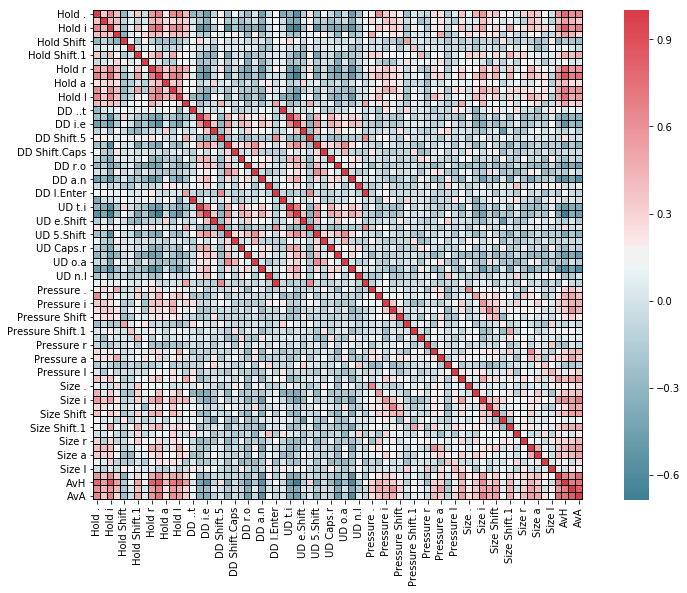

In [36]:
################################ Analisis Correlacion ############################################################
###################################### Grafica ###################################################################
datosCorrelacion = df_subject1.iloc[:,1:72]
import seaborn as sns
#seaborn heatmap= Sns Heatmap:
f, ax = plt.subplots(figsize=(15, 9))
corr = datosCorrelacion.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, linewidths = 0.007, linecolor = 'black' )

C:\Users\johng\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


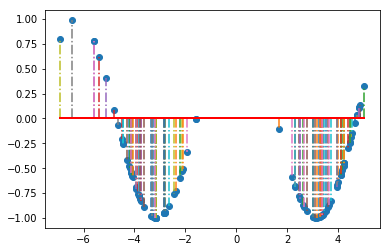

C:\Users\johng\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


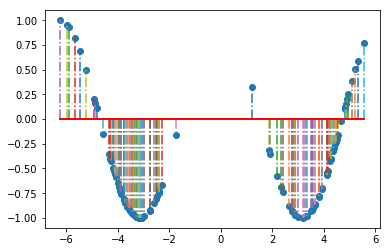

C:\Users\johng\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


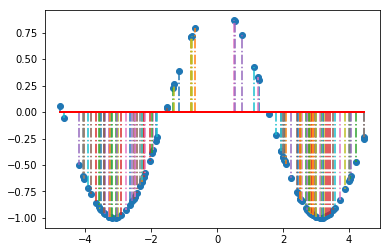

In [37]:
################################# ANALISIS DE FISHER###########################
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

for s in range(0,3):
    result = list()
    #print("EXPERIMENTO USER ",s)
    data = subjects[s]
    X = data[:,0:72]
    y = data[:,72]
    clf = LinearDiscriminantAnalysis()
    X_t = clf.fit_transform(X, y)
    markerline, stemlines, baseline = plt.stem(X_t, np.cos(X_t), '-.')

    # setting property of baseline with color red and linewidth 2
    plt.setp(baseline, color='r', linewidth=2)

    plt.show()
###############################################################################

In [189]:
################################# Analisis de componentes########################################
############################### Varianza acumulada ##############################################
from sklearn.decomposition import PCA 
for s in range(0,len(subjects)):
    result = list()
    #print("EXPERIMENTO USER ",s)
    data = subjects[s]
    X = data[:,0:72]
    y = data[:,72]
    np.random.seed(0) 
    my_model = PCA(n_components=15) 
    my_model.fit_transform(X) 

    print (str(my_model.explained_variance_))
    print (str(my_model.explained_variance_ratio_) )
    print (str(my_model.explained_variance_ratio_.cumsum())) 
    print ('###########################################################################################')

###############################################################################

[1.15913624e+06 8.04578977e+05 4.78318980e+05 3.18578126e+05
 2.67884466e+05 2.17671214e+05 1.87444286e+05 1.04607214e+05
 8.27604379e+04 4.11064919e+04 3.97034457e+04 2.25499937e+04
 1.15162319e+04 3.35190240e+03 1.01241035e+03]
[3.09641723e-01 2.14928334e-01 1.27774034e-01 8.51022309e-02
 7.15603609e-02 5.81468229e-02 5.00722604e-02 2.79438748e-02
 2.21079142e-02 1.09808360e-02 1.06060383e-02 6.02381210e-03
 3.07634750e-03 8.95398486e-04 2.70446625e-04]
[0.30964172 0.52457006 0.65234409 0.73744632 0.80900668 0.86715351
 0.91722577 0.94516964 0.96727755 0.97825839 0.98886443 0.99488824
 0.99796459 0.99885999 0.99913043]
###########################################################################################
[1.19478749e+06 3.78275130e+05 2.74905899e+05 2.47299972e+05
 2.24297335e+05 1.49399369e+05 1.13977838e+05 7.43001151e+04
 5.95957693e+04 4.96748295e+04 3.28779742e+04 2.02318222e+04
 1.02661095e+04 2.35488568e+03 7.27299532e+02]
[4.21210886e-01 1.33357273e-01 9.69154414e-02 8.7

In [190]:
################################# Simulaciones con PCA ###########################################

##################################################################################################
def simulacionesPCA(subjects,modelos):
    Folds = 5
    sensitivityManual = np.zeros(Folds)
    specificityManual = np.zeros(Folds)
    sensitivityLab = np.zeros(Folds)
    precisionLab = np.zeros(Folds)
    accuracyLab = np.zeros(Folds)
    FalseNegativeRate = np.zeros(Folds)
    EficienciaTest = np.zeros(Folds)
    random.seed(19680801)
    EficienciaTrain = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    kf = KFold(n_splits=Folds,shuffle=True)
    psv_mean = np.zeros(Folds)
    resultadosPCA = list()
    k=0
    tiempo = np.zeros(Folds)
    for s in range(0,len(subjects)):
        result = list()
        #print("EXPERIMENTO USER ",s)
        data = subjects[s]
        X = data[:,0:72]
        y = data[:,72]
        for m in range(0,len(modelos)):
            tiempo_i = time.time()
            #eficienciaResultados = np.zeros(10)
            #especificidadResultados = np.zeros(10)
            #sensibilidadResultados = np.zeros(10)
            #presicionResultado = np.zeros(10)
            j = 0
            #print("MODELO ",modelos[m][0])
            for train, test in kf.split(X):
                #PCA
                X_ex = PCA(n_components=15).fit_transform(X)
                #print(train.shape, test.shape)
                Xtrain = X_ex[train,:]
                Ytrain = y[train]
                Xtest = X_ex[test,:]
                Ytest = y[test]

                #Normalizamos los datos
                scaler = preprocessing.StandardScaler().fit(Xtrain)
                Xtrain = scaler.transform(Xtrain)
                Xtest = scaler.transform(Xtest)

                modelos[m][1].fit(Xtrain,Ytrain)

                #Validación
                ypred = modelos[m][1].predict(Xtest)
                #print(Ytest)
                EficienciaTrain[j], EficienciaTest[j], specificityManual[j], sensitivityLab[j], precisionLab[j], accuracyLab[j], FalseNegativeRate[j] = metrics(Ytrain,ypred,Ytest)
                tiempo[j] = time.time()-tiempo_i
                j+=1
                
            #EficienciaTest,sensitivityManual, specificityManual, sensitivityLab, precisionLab = np.mean(EficienciaTest), np.mean(sensitivityManual), np.mean(specificityManual), np.mean(sensitivityLab), np.mean(precisionLab)
            k+=1
            
            result.append([s, modelos[m][0], np.mean(EficienciaTrain), np.std(EficienciaTrain) ,np.mean(EficienciaTest), np.std(EficienciaTest) ,np.mean(specificityManual),np.std(specificityManual) ,np.mean(sensitivityLab),np.std(sensitivityLab) ,np.mean(precisionLab),np.std(precisionLab) ,np.mean(accuracyLab), np.std(accuracyLab) ,np.mean(FalseNegativeRate), np.std(FalseNegativeRate),np.mean(tiempo)])
            #print('Eficiencia durante la validación = ' + str(np.mean(EficienciaTest)) + ' Especificidad = ' + str(np.mean(specificityManual)) + ' sensibilidad = ' + str(np.mean(sensitivityLab)) + ' precision = ' + str(np.mean(precisionLab)))
        resultadosPCA.append(result)
    return resultadosPCA

In [191]:
################################# Simulaciones con PCA ###########################################

##################################################################################################

################################# MODELOS #####################################

#Mejores modelos
# 1. SVM - Kernel lineal                                                                 0.008397
# 2. Naive Bayes                                                                         0.009597
# 3. Random Forest con parametros por defecto                                            0.040186

# Modelo #1 Naive Bayes
modelo1 = GaussianNB()

# Modelo # 7 Random Forest con parametros por defecto 
#numero de arboles = 10
modelo7 = RandomForestClassifier()

# Modelo # 11 SVM - Kernel lineal
kernel='linear'
#c=1
#gamma= 'auto'
modelo11 = SVC(kernel=kernel)


###############################################################################

modelos = [('Naive Bayes', modelo1),
          ('Random Forest con parametros por defecto', modelo7),
          ('SVM - Kernel lineal' , modelo11)]

resultadosPCA = simulacionesPCA(subjects,modelos)

C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future

C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future

C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future

C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future

In [194]:
columns=["user","models","Eficiencia entrenamiento","IC (+-)", "Eficiencia validación","IC (+-)","Especificidad","IC (+-)","Sensibilidad","IC (+-)","Precisión","IC (+-)","Eficiencia","IC (+-)","Tasa de falsos negativos","IC (+-)","Tiempo"]
result0 = pd.DataFrame(resultadosPCA[0],columns=columns)
result1 = pd.DataFrame(resultadosPCA[1],columns=columns)
result2 = pd.DataFrame(resultadosPCA[2],columns=columns)
result3 = pd.DataFrame(resultadosPCA[3],columns=columns)
result4 = pd.DataFrame(resultadosPCA[4],columns=columns)
result5 = pd.DataFrame(resultadosPCA[5],columns=columns)
result6 = pd.DataFrame(resultadosPCA[6],columns=columns)
result7 = pd.DataFrame(resultadosPCA[7],columns=columns)
result8 = pd.DataFrame(resultadosPCA[8],columns=columns)
result9 = pd.DataFrame(resultadosPCA[9],columns=columns)

In [196]:
resultados_finalesPCA = result0.append(result1).append(result2).append(result3).append(result4).append(result5).append(result6).append(result7).append(result8).append(result9).set_index(['user','models'])

In [211]:
np.savetxt("SimulacionesPCA.csv", resultados_finalesPCA, delimiter=",")
#resultados_finalesPCA

In [210]:
#resultados_finales
cond = resultados_finalesPCA.Eficiencia > 0.90
rows = resultados_finalesPCA.loc[cond, :]
list_df =[] 
list_df.append(rows)
pd_mejores_finales_PCA = pd.concat(list_df)
#pd_mejores_finales_PCA['Eficiencia'].sort_values(ascending = False)
pd_mejores_finales_PCA.sort_values(['Eficiencia'],ascending = False)

Eficiencia entrenamiento  \
user models                                                               
6    SVM - Kernel lineal                                            0.0   
     Random Forest con parametros por defecto                       0.0   
     Naive Bayes                                                    0.0   
5    SVM - Kernel lineal                                            0.0   

                                               IC (+-)  Eficiencia validación  \
user models                                                                     
6    SVM - Kernel lineal                           0.0               0.980476   
     Random Forest con parametros por defecto      0.0               0.970476   
     Naive Bayes                                   0.0               0.950476   
5    SVM - Kernel lineal                           0.0               0.941429   

                                                IC (+-)  Especificidad  \
user models                                                              
6    SVM - Kernel lineal                       0.023924       0.977778   
     Random Forest con parametros por defecto  0.024122       0.941667   
     Naive Bayes                               0.044731       0.926667   
5    SVM - Kernel lineal                       0.036564       0.933333   

                                                IC (+-)  Sensibilidad  \
user models                                                             
6    SVM - Kernel lineal                       0.044444      0.977778   
     Random Forest con parametros por defecto  0.051099      0.941667   
     Naive Bayes                               0.090431      0.926667   
5    SVM - Kernel lineal                       0.062361      0.933333   

                                                IC (+-)  Precisión   IC (+-)  \
user models                                                                    
6    SVM - Kernel lineal                       0.044444   0.981818  0.036364   
     Random Forest con parametros por defecto  0.051099   1.000000  0.000000   
     Naive Bayes                               0.090431   0.983333  0.033333   
5    SVM - Kernel lineal                       0.062361   0.961111  0.048432   

                                               Eficiencia   IC (+-)  \
user models                                                           
6    SVM - Kernel lineal                         0.980476  0.023924   
     Random Forest con parametros por defecto    0.970476  0.024122   
     Naive Bayes                                 0.950476  0.044731   
5    SVM - Kernel lineal                         0.941429  0.036564   

                                               Tasa de falsos negativos  \
user models                                                               
6    SVM - Kernel lineal                                       0.022222   
     Random Forest con parametros por defecto                  0.058333   
     Naive Bayes                                               0.073333   
5    SVM - Kernel lineal                                       0.066667   

                                                IC (+-)    Tiempo  
user models                                                        
6    SVM - Kernel lineal                       0.044444  0.012595  
     Random Forest con parametros por defecto  0.051099  0.044585  
     Naive Bayes                               0.090431  0.011196  
5    SVM - Kernel lineal                       0.062361  0.010597

In [111]:
################################# Simulaciones con Seleccion ###########################################

##################################################################################################
!pip install mlxtend

from mlxtend.feature_selection import SequentialFeatureSelector as SFS


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
C:\Users\johng\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Users\johng\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Users\johng\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)


In [112]:

#Feature Selection Function

def select_features(modelo, n_features, fwd, fltg):
    
    sfs = SFS(modelo, 
           k_features=n_features, 
           forward=fwd,
           floating=fltg,
           verbose=1,
           scoring='accuracy',
           cv=0,
           n_jobs=-1)
    
    return sfs


Se está usando una función tipo wrapper. La función objetivo es un modelo, en este caso es un modelo es vectores de soporte que se manda como el valor 

In [113]:
################################# Simulaciones con Seleccion ###########################################

##################################################################################################
def simulacionesSeleccion(subjects,modelos):
    Folds = 5
    sensitivityManual = np.zeros(Folds)
    specificityManual = np.zeros(Folds)
    sensitivityLab = np.zeros(Folds)
    precisionLab = np.zeros(Folds)
    accuracyLab = np.zeros(Folds)
    FalseNegativeRate = np.zeros(Folds)
    EficienciaTest = np.zeros(Folds)
    random.seed(19680801)
    EficienciaTrain = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    kf = KFold(n_splits=Folds,shuffle=True)
    psv_mean = np.zeros(Folds)
    tiempo = np.zeros(Folds)
    resultadosSeleccion = list()
    k=0
    for s in range(0,len(subjects)):
        result = list()
        #print("EXPERIMENTO USER ",s)
        data = subjects[s]
        X = data[:,0:72]
        y = data[:,72]
        for m in range(0,len(modelos)):
            tiempo_i = time.time()
            #eficienciaResultados = np.zeros(10)
            #especificidadResultados = np.zeros(10)
            #sensibilidadResultados = np.zeros(10)
            #presicionResultado = np.zeros(10)
            j = 0
            #print("MODELO ",modelos[m][0])
            for train, test in kf.split(X):
                #print(train.shape, test.shape)
                Xtrain = X[train,:]
                Ytrain = y[train]
                Xtest = X[test,:]
                Ytest = y[test]
                
                #Seleccion de caracteristicas
                # Sequential Backward Floating Selection
                modelo = modelos[m][1]
                n_features = 15
                fwd = False
                fltg = False
                sf = select_features(modelo, n_features , fwd, fltg)
                sf = sf.fit(Xtrain, Ytrain) 
                # Generate the new subsets based on the selected features
                # Note that the transform call is equivalent to
                # X_train[:, sfs1.k_feature_idx_]
                X_train_sfs = sf.transform(Xtrain)
                X_test_sfs = sf.transform(Xtest)
                
                #Normalizamos los datos
                scaler = preprocessing.StandardScaler().fit(X_train_sfs)
                Xtrain = scaler.transform(X_train_sfs)
                Xtest = scaler.transform(X_test_sfs)

                modelos[m][1].fit(Xtrain,Ytrain)

                #Validación
                ypred = modelos[m][1].predict(Xtest)
                #print(Ytest)
                EficienciaTrain[j], EficienciaTest[j], specificityManual[j], sensitivityLab[j], precisionLab[j], accuracyLab[j], FalseNegativeRate[j] = metrics(Ytrain,ypred,Ytest)
                tiempo[j] = time.time()-tiempo_i
                j+=1
                
            #EficienciaTest,sensitivityManual, specificityManual, sensitivityLab, precisionLab = np.mean(EficienciaTest), np.mean(sensitivityManual), np.mean(specificityManual), np.mean(sensitivityLab), np.mean(precisionLab)
            k+=1
            
            result.append([s, modelos[m][0], np.mean(EficienciaTrain), np.std(EficienciaTrain) ,np.mean(EficienciaTest), np.std(EficienciaTest) ,np.mean(specificityManual),np.std(specificityManual) ,np.mean(sensitivityLab),np.std(sensitivityLab) ,np.mean(precisionLab),np.std(precisionLab) ,np.mean(accuracyLab), np.std(accuracyLab) ,np.mean(FalseNegativeRate), np.std(FalseNegativeRate),np.mean(tiempo)])
            #print('Eficiencia durante la validación = ' + str(np.mean(EficienciaTest)) + ' Especificidad = ' + str(np.mean(specificityManual)) + ' sensibilidad = ' + str(np.mean(sensitivityLab)) + ' precision = ' + str(np.mean(precisionLab)))
        resultadosSeleccion.append(result)
    return resultadosSeleccion

In [114]:
################################# Simulaciones con Seleccion ###########################################

##################################################################################################

################################# MODELOS #####################################


#Mejores modelos
# 1. SVM - Kernel lineal                                                                 0.008397
# 2. Naive Bayes                                                                         0.009597
# 3. Random Forest con parametros por defecto                                            0.040186

# Modelo #1 Naive Bayes
modelo1 = GaussianNB()

# Modelo # 7 Random Forest con parametros por defecto 
#numero de arboles = 10
modelo7 = RandomForestClassifier()

# Modelo # 11 SVM - Kernel lineal
kernel='linear'
#c=1
#gamma= 'auto'
modelo11 = SVC(kernel=kernel)

###############################################################################
modelos = [('Naive Bayes', modelo1),
          ('Random Forest con parametros por defecto', modelo7),
          ('SVM - Kernel lineal' , modelo11)]

resultadosSeleccion = simulacionesSeleccion(subjects,modelos)

[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    1.2s finished
Features: 71/15[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    1.3s finished
Features: 70/15[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.3s finished
Features: 69/15[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    1.2s finished
Features: 68/15[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    1.3s finished
Features: 67/15[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    1.2s finished
Features: 66/15[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    1.2s finished
Features: 65/15[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    1.2s finished
Features: 64/15[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.3s finished
Features: 63/15[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.3s finished
Features: 62/15[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.3s finished
Features: 61/15[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed: 

Features: 52/15[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    1.2s finished
Features: 51/15[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    1.1s finished
Features: 50/15[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished
Features: 49/15[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    1.2s finished
Features: 48/15[Parallel(n_jobs=-1)]: Done  41 out of  48 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.2s finished
Features: 47/15[Parallel(n_jobs=-1)]: Done  40 out of  47 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    1.1s finished
Features: 46/15[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    1.1s finished
Features: 45/15[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.1s finished
Features: 44/15[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed: 

Features: 36/15[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.1s finished
Features: 35/15[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.1s finished
Features: 34/15[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    1.1s finished
Features: 33/15[Parallel(n_jobs=-1)]: Done  26 out of  33 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    1.1s finished
Features: 32/15[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    1.1s finished
Features: 31/15[Parallel(n_jobs=-1)]: Done  24 out of  31 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.1s finished
Features: 30/15[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished
Features: 29/15[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:    1.

Features: 22/15[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.1s finished
Features: 21/15[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.1s finished
Features: 20/15[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.1s finished
Features: 19/15[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    1.1s finished
Features: 18/15[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.1s finished
Features: 17/15[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    1.1s finished
Features: 16/15[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.1s finished
Features: 15/15C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
[Parallel(n_jobs=-1)]: Done  72 out of  72 | el

Features: 66/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    3.3s finished
Features: 65/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    3.3s finished
Features: 64/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    3.3s finished
Features: 63/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    3.2s finished
Features: 62/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.1s finished
Features: 61/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    3.1s finished
Features: 60/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  60 out

Features: 58/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    3.2s finished
Features: 57/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    3.2s finished
Features: 56/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    3.1s finished
Features: 55/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    3.1s finished
Features: 54/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    3.3s finished
Features: 53/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    3.1s finished
Features: 52/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  52 out

Features: 50/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.9s finished
Features: 49/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    2.9s finished
Features: 48/15[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    2.9s finished
Features: 47/15[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    2.8s finished
Features: 46/15[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    2.8s finished
Features: 45/15[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.7s finished
Features: 44/15[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    2.7s finished
Features: 43/15[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    2.6s finished
Features: 42/15[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    2.6s finished
Features: 41/15[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    2.6s finished
Features: 40/15[

Features: 38/15[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    2.5s finished
Features: 37/15[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    2.5s finished
Features: 36/15[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    2.4s finished
Features: 35/15[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    2.3s finished
Features: 34/15[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    2.3s finished
Features: 33/15[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    2.3s finished
Features: 32/15[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    2.2s finished
Features: 31/15[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    2.2s finished
Features: 30/15[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.2s finished
Features: 29/15[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    2.2s finished
Features: 28/15[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    2.2s finished
Features: 27/15[Parallel(n_jobs=-1)]: Done  27 out of 

Features: 67/15[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    1.4s finished
Features: 66/15[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    1.3s finished
Features: 65/15[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    1.4s finished
Features: 64/15[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.3s finished
Features: 63/15[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.4s finished
Features: 62/15[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.3s finished
Features: 61/15[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    1.4s finished
Features: 60/15[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
Features: 59/15[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.3s finished
Features: 58/15[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    1.3s finished
Features: 57/15[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    1.3s finished
Features: 56/15[Parallel(n_jobs=-1)]: Done  56 out of 

Features: 47/15[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    1.3s finished
Features: 46/15[Parallel(n_jobs=-1)]: Done  39 out of  46 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    1.3s finished
Features: 45/15[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.3s finished
Features: 44/15[Parallel(n_jobs=-1)]: Done  37 out of  44 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    1.2s finished
Features: 43/15[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    1.3s finished
Features: 42/15[Parallel(n_jobs=-1)]: Done  35 out of  42 | elapsed:    1.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.3s finished
Features: 41/15[Parallel(n_jobs=-1)]: Done  34 out of  41 | elapsed:    1.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.3s finished
Features: 40/15[Parallel(n_jobs=-1)]: Done  33 out of  40 | elapsed:    1.

Features: 34/15[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    1.3s finished
Features: 33/15[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    1.3s finished
Features: 32/15[Parallel(n_jobs=-1)]: Done  25 out of  32 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    1.3s finished
Features: 31/15[Parallel(n_jobs=-1)]: Done  24 out of  31 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.3s finished
Features: 30/15[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.3s finished
Features: 29/15[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    1.3s finished
Features: 28/15[Parallel(n_jobs=-1)]: Done  21 out of  28 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    1.3s fi

Features: 16/15[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.2s finished
Features: 15/15C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    1.2s finished
Features: 71/15[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    1.1s finished
Features: 70/15[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.2s finished
Features: 69/15[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    1.2s finished
Features: 68/15[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    1.2s finished
Features: 67/15[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    1.1s finished
Features: 66/15[Parallel(n_jobs=-1)]: Done  66 out of  66 | el

Features: 60/15[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
Features: 59/15[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.1s finished
Features: 58/15[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    1.1s finished
Features: 57/15[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    1.1s finished
Features: 56/15[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.1s finished
Features: 55/15[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.1s finished
Features: 54/15[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.1s finished
Features: 53/15[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    1.2s finished
Features: 52/15[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    1.1s finished
Features: 51/15[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    1.1s finished
Features: 50/15[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished
Features: 49/15[Parallel(n_jobs=-1)]: Done  49 out of 

Features: 45/15[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.2s finished
Features: 44/15[Parallel(n_jobs=-1)]: Done  37 out of  44 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    1.2s finished
Features: 43/15[Parallel(n_jobs=-1)]: Done  36 out of  43 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    1.2s finished
Features: 42/15[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.1s finished
Features: 41/15[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.2s finished
Features: 40/15[Parallel(n_jobs=-1)]: Done  33 out of  40 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.2s finished
Features: 39/15[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    1.2s finished
Features: 38/15[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    1.1s finished
Features: 37/15[Parallel(n_jobs=-1)]: Done  30 out of  37 | elapsed: 

Features: 32/15[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    1.1s finished
Features: 31/15[Parallel(n_jobs=-1)]: Done  24 out of  31 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.1s finished
Features: 30/15[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished
Features: 29/15[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    1.2s finished
Features: 28/15[Parallel(n_jobs=-1)]: Done  21 out of  28 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    1.1s finished
Features: 27/15[Parallel(n_jobs=-1)]: Done  20 out of  27 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.2s finished
Features: 26/15[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    1.1s fi

Features: 19/15[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    1.1s finished
Features: 18/15[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.1s finished
Features: 17/15[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    1.1s finished
Features: 16/15[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.1s finished
Features: 15/15C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\johng\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.


Features: 71/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    3.9s finished
Features: 70/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.9s finished
Features: 69/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    3.9s finished
Features: 68/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    3.8s finished
Features: 67/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    3.7s finished
Features: 66/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    3.7s finished
Features: 65/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  65 out

Features: 63/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    3.6s finished
Features: 62/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.5s finished
Features: 61/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    3.5s finished
Features: 60/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.5s finished
Features: 59/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    3.4s finished
Features: 58/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    3.4s finished
Features: 57/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  57 out

Features: 55/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    3.3s finished
Features: 54/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    3.4s finished
Features: 53/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    3.2s finished
Features: 52/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    3.1s finished
Features: 51/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    3.1s finished
Features: 50/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.0s finished
Features: 49/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  49 out

Features: 28/15[Parallel(n_jobs=-1)]: Done  21 out of  28 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    1.2s finished
Features: 27/15[Parallel(n_jobs=-1)]: Done  20 out of  27 | elapsed:    1.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.2s finished
Features: 26/15[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    1.3s finished
Features: 25/15[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.2s finished
Features: 24/15[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.2s finished
Features: 23/15[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    1.3s finished
Features: 22/15[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.3s finished
Features: 21/15[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.2s finished
Features: 20/15[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.2s finished
Features: 19/15[Parallel(n_jobs=-1)]: Done  19 out of  19 | elap

[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    1.4s finished
Features: 71/15[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    1.3s finished
Features: 70/15[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.3s finished
Features: 69/15[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    1.3s finished
Features: 68/15[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    1.3s finished
Features: 67/15[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    1.3s finished
Features: 66/15[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    1.3s finished
Features: 65/15[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    1.3s finished
Features: 64/15[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.3s finished
Features: 63/15[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.3s finished
Features: 62/15[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.3s finished
Features: 61/15[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed: 

Features: 52/15[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    1.3s finished
Features: 51/15[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    1.3s finished
Features: 50/15[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.2s finished
Features: 49/15[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    1.3s finished
Features: 48/15[Parallel(n_jobs=-1)]: Done  41 out of  48 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.3s finished
Features: 47/15[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    1.2s finished
Features: 46/15[Parallel(n_jobs=-1)]: Done  39 out of  46 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    1.3s finished
Features: 45/15[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.2s finished
Features: 44/15[Parallel(n_jobs=-1)]: Done  37 out of  44 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed: 

Features: 39/15[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    1.2s finished
Features: 38/15[Parallel(n_jobs=-1)]: Done  31 out of  38 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    1.2s finished
Features: 37/15[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    1.2s finished
Features: 36/15[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.2s finished
Features: 35/15[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.2s finished
Features: 34/15[Parallel(n_jobs=-1)]: Done  27 out of  34 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    1.2s finished
Features: 33/15[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    1.2s finished
Features: 32/15[Parallel(n_jobs=-1)]: Done  25 out of  32 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    1.

Features: 27/15[Parallel(n_jobs=-1)]: Done  20 out of  27 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.1s finished
Features: 26/15[Parallel(n_jobs=-1)]: Done  19 out of  26 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    1.1s finished
Features: 25/15[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.1s finished
Features: 24/15[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.1s finished
Features: 23/15[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    1.1s finished
Features: 22/15[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.1s finished
Features: 21/15[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.1s finished
Features: 20/15[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.1s finished
Features: 19/15[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    1.1s finished
Features: 18/15[Parallel(n_jobs=-1)]: Done  18 out of  18 | elap

[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    1.2s finished
Features: 71/15[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    1.1s finished
Features: 70/15[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.1s finished
Features: 69/15[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    1.2s finished
Features: 68/15[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    1.1s finished
Features: 67/15[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    1.2s finished
Features: 66/15[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    1.2s finished
Features: 65/15[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    1.1s finished
Features: 64/15[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.2s finished
Features: 63/15[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.1s finished
Features: 62/15[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.1s finished
Features: 61/15[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed: 

Features: 50/15[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.2s finished
Features: 49/15[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    1.1s finished
Features: 48/15[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.1s finished
Features: 47/15[Parallel(n_jobs=-1)]: Done  40 out of  47 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    1.1s finished
Features: 46/15[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    1.1s finished
Features: 45/15[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.1s finished
Features: 44/15[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    1.1s finished
Features: 43/15[Parallel(n_jobs=-1)]: Done  36 out of  43 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    1.1s finished
Features: 42/15[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed: 

Features: 36/15[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.1s finished
Features: 35/15[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.1s finished
Features: 34/15[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    1.1s finished
Features: 33/15[Parallel(n_jobs=-1)]: Done  26 out of  33 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    1.1s finished
Features: 32/15[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    1.1s finished
Features: 31/15[Parallel(n_jobs=-1)]: Done  24 out of  31 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.1s finished
Features: 30/15[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished
Features: 29/15[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:    1.

Features: 26/15[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    2.1s finished
Features: 25/15[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.1s finished
Features: 24/15[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    2.0s finished
Features: 23/15[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    1.9s finished
Features: 22/15[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.9s finished
Features: 21/15[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.9s finished
Features: 20/15[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.9s finished
Features: 19/15[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    1.8s finished
Features: 18/15[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.8s finished
Features: 17/15[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    1.8s finished
Features: 16/15[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.7s finished
Features: 15/15C:\Users\johng\Anaconda3\lib\site-packa

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    4.0s finished
Features: 71/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    4.0s finished
Features: 70/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.9s finished
Features: 69/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    4.0s finished
Features: 68/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    3.9s finished
Features: 67/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    3.8s finished
Features: 66/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elaps

Features: 64/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    3.7s finished
Features: 63/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    3.7s finished
Features: 62/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.6s finished
Features: 61/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    3.6s finished
Features: 60/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.6s finished
Features: 59/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    3.5s finished
Features: 58/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  58 out

Features: 56/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    3.3s finished
Features: 55/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    3.3s finished
Features: 54/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    3.2s finished
Features: 53/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    3.6s finished
Features: 52/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    3.2s finished
Features: 51/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    3.2s finished
Features: 50/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  50 out

Features: 37/15[Parallel(n_jobs=-1)]: Done  30 out of  37 | elapsed:    1.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    1.4s finished
Features: 36/15[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.4s finished
Features: 35/15[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.3s finished
Features: 34/15[Parallel(n_jobs=-1)]: Done  27 out of  34 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    1.4s finished
Features: 33/15[Parallel(n_jobs=-1)]: Done  26 out of  33 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    1.4s finished
Features: 32/15[Parallel(n_jobs=-1)]: Done  25 out of  32 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    1.4s finished
Features: 31/15[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.4s finished
Features: 30/15[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    1.

Features: 22/15[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.3s finished
Features: 21/15[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.3s finished
Features: 20/15[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.3s finished
Features: 19/15[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    1.2s finished
Features: 18/15[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.2s finished
Features: 17/15[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    1.2s finished
Features: 16/15[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.2s finished
Features: 15/15C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
[Parallel(n_jobs=-1)]: Done  72 out of  72 | el

Features: 63/15[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.6s finished
Features: 62/15[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.6s finished
Features: 61/15[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    1.6s finished
Features: 60/15[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
Features: 59/15[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.6s finished
Features: 58/15[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    1.6s finished
Features: 57/15[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    1.6s finished
Features: 56/15[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.5s finished
Features: 55/15[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.6s finished
Features: 54/15[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.5s finished
Features: 53/15[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    1.5s finished
Features: 52/15[Parallel(n_jobs=-1)]: Done  52 out of 

Features: 44/15[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    1.5s finished
Features: 43/15[Parallel(n_jobs=-1)]: Done  36 out of  43 | elapsed:    1.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    1.5s finished
Features: 42/15[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.5s finished
Features: 41/15[Parallel(n_jobs=-1)]: Done  34 out of  41 | elapsed:    1.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.4s finished
Features: 40/15[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.4s finished
Features: 39/15[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:    1.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    1.5s finished
Features: 38/15[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    1.5s finished
Features: 37/15[Parallel(n_jobs=-1)]: Done  30 out of  37 | elapsed:    1.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    1.

Features: 29/15[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    1.1s finished
Features: 28/15[Parallel(n_jobs=-1)]: Done  21 out of  28 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    1.1s finished
Features: 27/15[Parallel(n_jobs=-1)]: Done  20 out of  27 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.1s finished
Features: 26/15[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    1.2s finished
Features: 25/15[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.1s finished
Features: 24/15[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.1s finished
Features: 23/15[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    1.1s finished
Features: 22/15[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.1s finished
Features: 21/15[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 

Features: 15/15C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\johng\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    1.2s finished
Features: 71/15[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    1.2s finished
Features: 70/15[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.1s finished
Features: 69/15[Parallel(n_jobs=-1)]: Done  69 out of  69 | el

Features: 62/15[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.1s finished
Features: 61/15[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    1.1s finished
Features: 60/15[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
Features: 59/15[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.2s finished
Features: 58/15[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    1.1s finished
Features: 57/15[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    1.1s finished
Features: 56/15[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.1s finished
Features: 55/15[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.2s finished
Features: 54/15[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.1s finished
Features: 53/15[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    1.2s finished
Features: 52/15[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    1.1s finished
Features: 51/15[Parallel(n_jobs=-1)]: Done  51 out of 

Features: 45/15[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.1s finished
Features: 44/15[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    1.1s finished
Features: 43/15[Parallel(n_jobs=-1)]: Done  36 out of  43 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    1.1s finished
Features: 42/15[Parallel(n_jobs=-1)]: Done  35 out of  42 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.2s finished
Features: 41/15[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.3s finished
Features: 40/15[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.2s finished
Features: 39/15[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    1.1s finished
Features: 38/15[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    1.

Features: 45/15[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.9s finished
Features: 44/15[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    2.9s finished
Features: 43/15[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    2.7s finished
Features: 42/15[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    2.7s finished
Features: 41/15[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    2.8s finished
Features: 40/15[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.7s finished
Features: 39/15[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    2.6s finished
Features: 38/15[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    2.6s finished
Features: 37/15[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    2.6s finished
Features: 36/15[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    2.5s finished
Features: 35/15[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    2.4s finished
Features: 34/15[Parallel(n_jobs=-1)]: Done  34 out of 

Features: 19/15[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    1.8s finished
Features: 18/15[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.8s finished
Features: 17/15[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    1.7s finished
Features: 16/15[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.7s finished
Features: 15/15C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\johng\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.


Features: 71/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    4.2s finished
Features: 70/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    4.1s finished
Features: 69/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    4.0s finished
Features: 68/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    3.9s finished
Features: 67/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    3.9s finished
Features: 66/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    3.9s finished
Features: 65/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  65 out

Features: 57/15[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    1.4s finished
Features: 56/15[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.4s finished
Features: 55/15[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.5s finished
Features: 54/15[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.4s finished
Features: 53/15[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    1.4s finished
Features: 52/15[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    1.4s finished
Features: 51/15[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    1.4s finished
Features: 50/15[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.4s finished
Features: 49/15[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    1.4s finished
Features: 48/15[Parallel(n_jobs=-1)]: Done  41 out of  48 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.4s finished
Features: 47/15[Parallel(n_jobs=-1)]: Done  47 out of  47 |

Features: 40/15[Parallel(n_jobs=-1)]: Done  33 out of  40 | elapsed:    1.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.3s finished
Features: 39/15[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    1.4s finished
Features: 38/15[Parallel(n_jobs=-1)]: Done  31 out of  38 | elapsed:    1.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    1.3s finished
Features: 37/15[Parallel(n_jobs=-1)]: Done  30 out of  37 | elapsed:    1.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    1.4s finished
Features: 36/15[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:    1.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.3s finished
Features: 35/15[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.3s finished
Features: 34/15[Parallel(n_jobs=-1)]: Done  27 out of  34 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    1.3s fi

Features: 28/15[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    1.3s finished
Features: 27/15[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.2s finished
Features: 26/15[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    1.2s finished
Features: 25/15[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.2s finished
Features: 24/15[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.3s finished
Features: 23/15[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    1.3s finished
Features: 22/15[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.2s finished
Features: 21/15[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.2s finished
Features: 20/15[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.2s finished
Features: 19/15[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    1.2s finished
Features: 18/15[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.2s finished
Features: 17/15[Parallel(n_jobs=-1)]: Done  17 out of 

Features: 67/15[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    1.6s finished
Features: 66/15[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    1.7s finished
Features: 65/15[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    1.6s finished
Features: 64/15[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.6s finished
Features: 63/15[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.6s finished
Features: 62/15[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.6s finished
Features: 61/15[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    1.6s finished
Features: 60/15[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
Features: 59/15[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.6s finished
Features: 58/15[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    1.5s finished
Features: 57/15[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    1.6s finished
Features: 56/15[Parallel(n_jobs=-1)]: Done  56 out of 

Features: 46/15[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    1.2s finished
Features: 45/15[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.1s finished
Features: 44/15[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    1.1s finished
Features: 43/15[Parallel(n_jobs=-1)]: Done  36 out of  43 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    1.1s finished
Features: 42/15[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.1s finished
Features: 41/15[Parallel(n_jobs=-1)]: Done  34 out of  41 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.1s finished
Features: 40/15[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.1s finished
Features: 39/15[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    1.

Features: 34/15[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    1.1s finished
Features: 33/15[Parallel(n_jobs=-1)]: Done  26 out of  33 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    1.1s finished
Features: 32/15[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    1.1s finished
Features: 31/15[Parallel(n_jobs=-1)]: Done  24 out of  31 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.1s finished
Features: 30/15[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished
Features: 29/15[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    1.1s finished
Features: 28/15[Parallel(n_jobs=-1)]: Done  21 out of  28 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    1.1s fi

Features: 22/15[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.2s finished
Features: 21/15[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.1s finished
Features: 20/15[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.1s finished
Features: 19/15[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    1.1s finished
Features: 18/15[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.1s finished
Features: 17/15[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    1.1s finished
Features: 16/15[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.1s finished
Features: 15/15C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipyk

Features: 68/15[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    1.1s finished
Features: 67/15[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    1.1s finished
Features: 66/15[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    1.1s finished
Features: 65/15[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    1.2s finished
Features: 64/15[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.1s finished
Features: 63/15[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.1s finished
Features: 62/15[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.1s finished
Features: 61/15[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    1.1s finished
Features: 60/15[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
Features: 59/15[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.2s finished
Features: 58/15[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    1.1s finished
Features: 57/15[Parallel(n_jobs=-1)]: Done  57 out of 

Features: 60/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.4s finished
Features: 59/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    3.4s finished
Features: 58/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    3.3s finished
Features: 57/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    3.3s finished
Features: 56/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    3.3s finished
Features: 55/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    3.2s finished
Features: 54/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  54 out

Features: 52/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    3.1s finished
Features: 51/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    3.0s finished
Features: 50/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.0s finished
Features: 49/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    3.0s finished
Features: 48/15[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    2.9s finished
Features: 47/15[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    2.9s finished
Features: 46/15[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    2.6s finished
Features: 45/15[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.8s finished
Features: 44/15[Parallel(n_jobs=-1)]: Done  44 out of  44 | elap

Features: 29/15[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    2.2s finished
Features: 28/15[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    2.1s finished
Features: 27/15[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    2.1s finished
Features: 26/15[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    2.0s finished
Features: 25/15[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.0s finished
Features: 24/15[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    2.0s finished
Features: 23/15[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    1.9s finished
Features: 22/15[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.9s finished
Features: 21/15[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.9s finished
Features: 20/15[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.8s finished
Features: 19/15[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    1.8s finished
Features: 18/15[Parallel(n_jobs=-1)]: Done  18 out of 

Features: 59/15[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.2s finished
Features: 58/15[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    1.2s finished
Features: 57/15[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    1.2s finished
Features: 56/15[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.2s finished
Features: 55/15[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.2s finished
Features: 54/15[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.2s finished
Features: 53/15[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    1.2s finished
Features: 52/15[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    1.3s finished
Features: 51/15[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    1.2s finished
Features: 50/15[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.2s finished
Features: 49/15[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    1.2s finished
Features: 48/15[Parallel(n_jobs=-1)]: Done  41 out of 

Features: 41/15[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.2s finished
Features: 40/15[Parallel(n_jobs=-1)]: Done  33 out of  40 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.2s finished
Features: 39/15[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    1.2s finished
Features: 38/15[Parallel(n_jobs=-1)]: Done  31 out of  38 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    1.2s finished
Features: 37/15[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    1.2s finished
Features: 36/15[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.2s finished
Features: 35/15[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.2s finished
Features: 34/15[Parallel(n_jobs=-1)]: Done  27 out of  34 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    1.

Features: 27/15[Parallel(n_jobs=-1)]: Done  20 out of  27 | elapsed:    1.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.2s finished
Features: 26/15[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    1.2s finished
Features: 25/15[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.2s finished
Features: 24/15[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.2s finished
Features: 23/15[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    1.2s finished
Features: 22/15[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.2s finished
Features: 21/15[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.2s finished
Features: 20/15[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.2s finished
Features: 19/15[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    1.2s finished
Features: 18/15[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.2s finished
Features: 17/15[Parallel(n_jobs=-1)]: Done  17 out of  17 |

Features: 67/15[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    1.2s finished
Features: 66/15[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    1.2s finished
Features: 65/15[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    1.2s finished
Features: 64/15[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.2s finished
Features: 63/15[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.1s finished
Features: 62/15[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.2s finished
Features: 61/15[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    1.1s finished
Features: 60/15[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
Features: 59/15[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.1s finished
Features: 58/15[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    1.1s finished
Features: 57/15[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    1.1s finished
Features: 56/15[Parallel(n_jobs=-1)]: Done  56 out of 

Features: 37/15[Parallel(n_jobs=-1)]: Done  30 out of  37 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    1.1s finished
Features: 36/15[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.1s finished
Features: 35/15[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.1s finished
Features: 34/15[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    1.1s finished
Features: 33/15[Parallel(n_jobs=-1)]: Done  26 out of  33 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    1.1s finished
Features: 32/15[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    1.1s finished
Features: 31/15[Parallel(n_jobs=-1)]: Done  24 out of  31 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.1s finished
Features: 30/15[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    1.

Features: 26/15[Parallel(n_jobs=-1)]: Done  19 out of  26 | elapsed:    1.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    1.1s finished
Features: 25/15[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.1s finished
Features: 24/15[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.1s finished
Features: 23/15[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    1.1s finished
Features: 22/15[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.1s finished
Features: 21/15[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.1s finished
Features: 20/15[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.1s finished
Features: 19/15[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    1.1s finished
Features: 18/15[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.1s finished
Features: 17/15[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    1.1s finished
Features: 16/15[Parallel(n_jobs=-1)]: Done  16 out of  16 |

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    4.1s finished
Features: 71/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    4.1s finished
Features: 70/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    4.0s finished
Features: 69/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    4.0s finished
Features: 68/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    4.0s finished
Features: 67/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    3.9s finished
Features: 66/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elaps

Features: 64/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    3.8s finished
Features: 63/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    3.7s finished
Features: 62/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.7s finished
Features: 61/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    3.6s finished
Features: 60/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.5s finished
Features: 59/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    3.5s finished
Features: 58/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  58 out

Features: 56/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    3.4s finished
Features: 55/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    3.4s finished
Features: 54/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    3.3s finished
Features: 53/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    3.3s finished
Features: 52/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    3.2s finished
Features: 51/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    3.6s finished
Features: 50/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  50 out

Features: 48/15[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    3.1s finished
Features: 47/15[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    3.0s finished
Features: 46/15[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    2.9s finished
Features: 45/15[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.9s finished
Features: 44/15[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    2.9s finished
Features: 43/15[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    2.8s finished
Features: 42/15[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    2.8s finished
Features: 41/15[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    2.7s finished
Features: 40/15[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.7s finished
Features: 39/15[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    2.7s finished
Features: 38/15[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    2.6s finished
Features: 37/15[Parallel(n_jobs=-1)]: Done  37 out of 

Features: 18/15[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.2s finished
Features: 17/15[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    1.2s finished
Features: 16/15[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.2s finished
Features: 15/15C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    1.3s finished
Features: 71/15[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    1.4s finished
Features: 70/15[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.3s finished
Features: 69/15[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    1.3s finished
Features: 68/15[Parallel(n_jobs=-1)]: Done  68 out of  68 | el

Features: 57/15[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    1.3s finished
Features: 56/15[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.3s finished
Features: 55/15[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.3s finished
Features: 54/15[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.3s finished
Features: 53/15[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    1.2s finished
Features: 52/15[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    1.3s finished
Features: 51/15[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    1.3s finished
Features: 50/15[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.3s finished
Features: 49/15[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    1.2s finished
Features: 48/15[Parallel(n_jobs=-1)]: Done  41 out of  48 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.3s finished
Features: 47/15[Parallel(n_jobs=-1)]: Done  47 out of  47 |

Features: 41/15[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.2s finished
Features: 40/15[Parallel(n_jobs=-1)]: Done  33 out of  40 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.2s finished
Features: 39/15[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    1.2s finished
Features: 38/15[Parallel(n_jobs=-1)]: Done  31 out of  38 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    1.2s finished
Features: 37/15[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    1.3s finished
Features: 36/15[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.2s finished
Features: 35/15[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.2s finished
Features: 34/15[Parallel(n_jobs=-1)]: Done  27 out of  34 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    1.

Features: 26/15[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    1.3s finished
Features: 25/15[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.3s finished
Features: 24/15[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.2s finished
Features: 23/15[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    1.2s finished
Features: 22/15[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.2s finished
Features: 21/15[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.2s finished
Features: 20/15[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.2s finished
Features: 19/15[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    1.2s finished
Features: 18/15[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.2s finished
Features: 17/15[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    1.2s finished
Features: 16/15[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.2s finished
Features: 15/15C:\Users\johng\Anaconda3\lib\site-packa

Features: 64/15[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.2s finished
Features: 63/15[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.1s finished
Features: 62/15[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.2s finished
Features: 61/15[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    1.1s finished
Features: 60/15[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
Features: 59/15[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.1s finished
Features: 58/15[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    1.1s finished
Features: 57/15[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    1.1s finished
Features: 56/15[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.1s finished
Features: 55/15[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.1s finished
Features: 54/15[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.1s finished
Features: 53/15[Parallel(n_jobs=-1)]: Done  53 out of 

Features: 44/15[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    1.1s finished
Features: 43/15[Parallel(n_jobs=-1)]: Done  36 out of  43 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    1.1s finished
Features: 42/15[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.1s finished
Features: 41/15[Parallel(n_jobs=-1)]: Done  34 out of  41 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.1s finished
Features: 40/15[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.1s finished
Features: 39/15[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    1.1s finished
Features: 38/15[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    1.1s finished
Features: 37/15[Parallel(n_jobs=-1)]: Done  30 out of  37 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    1.

Features: 29/15[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    1.2s finished
Features: 28/15[Parallel(n_jobs=-1)]: Done  21 out of  28 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    1.2s finished
Features: 27/15[Parallel(n_jobs=-1)]: Done  20 out of  27 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.1s finished
Features: 26/15[Parallel(n_jobs=-1)]: Done  19 out of  26 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    1.1s finished
Features: 25/15[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.1s finished
Features: 24/15[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.1s finished
Features: 23/15[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    1.1s finished
Features: 22/15[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    3.7s finished
Features: 71/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    3.7s finished
Features: 70/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.7s finished
Features: 69/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    3.6s finished
Features: 68/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    3.6s finished
Features: 67/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    3.8s finished
Features: 66/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elaps

Features: 64/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    3.4s finished
Features: 63/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    3.4s finished
Features: 62/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.4s finished
Features: 61/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    3.4s finished
Features: 60/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.3s finished
Features: 59/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    3.2s finished
Features: 58/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  58 out

Features: 56/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    3.1s finished
Features: 55/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    3.1s finished
Features: 54/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    3.1s finished
Features: 53/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    3.1s finished
Features: 52/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    3.0s finished
Features: 51/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    2.9s finished
Features: 50/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  50 out

Features: 48/15[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    2.8s finished
Features: 47/15[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    2.8s finished
Features: 46/15[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    2.9s finished
Features: 45/15[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.7s finished
Features: 44/15[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    2.8s finished
Features: 43/15[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    2.6s finished
Features: 42/15[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    2.8s finished
Features: 41/15[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    2.7s finished
Features: 40/15[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.6s finished
Features: 39/15[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    2.5s finished
Features: 38/15[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    2.5s finished
Features: 37/15[Parallel(n_jobs=-1)]: Done  37 out of 

Features: 18/15[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.2s finished
Features: 17/15[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    1.2s finished
Features: 16/15[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.2s finished
Features: 15/15C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    1.2s finished
Features: 71/15[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    1.2s finished
Features: 70/15[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.2s finished
Features: 69/15[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    1.2s finished
Features: 68/15[Parallel(n_jobs=-1)]: Done  68 out of  68 | el

Features: 57/15[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    1.2s finished
Features: 56/15[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.2s finished
Features: 55/15[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.2s finished
Features: 54/15[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.2s finished
Features: 53/15[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    1.3s finished
Features: 52/15[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    1.2s finished
Features: 51/15[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    1.2s finished
Features: 50/15[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.2s finished
Features: 49/15[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    1.2s finished
Features: 48/15[Parallel(n_jobs=-1)]: Done  41 out of  48 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.2s finished
Features: 47/15[Parallel(n_jobs=-1)]: Done  47 out of  47 |

Features: 39/15[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    1.2s finished
Features: 38/15[Parallel(n_jobs=-1)]: Done  31 out of  38 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    1.3s finished
Features: 37/15[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    1.2s finished
Features: 36/15[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.2s finished
Features: 35/15[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.2s finished
Features: 34/15[Parallel(n_jobs=-1)]: Done  27 out of  34 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    1.2s finished
Features: 33/15[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    1.2s finished
Features: 32/15[Parallel(n_jobs=-1)]: Done  25 out of  32 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    1.

Features: 26/15[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    1.2s finished
Features: 25/15[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.2s finished
Features: 24/15[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.2s finished
Features: 23/15[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    1.2s finished
Features: 22/15[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.2s finished
Features: 21/15[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.2s finished
Features: 20/15[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.2s finished
Features: 19/15[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    1.2s finished
Features: 18/15[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.2s finished
Features: 17/15[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    1.2s finished
Features: 16/15[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.2s finished
Features: 15/15C:\Users\johng\Anaconda3\lib\site-packa

Features: 65/15[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    1.1s finished
Features: 64/15[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.1s finished
Features: 63/15[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.1s finished
Features: 62/15[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.2s finished
Features: 61/15[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    1.1s finished
Features: 60/15[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
Features: 59/15[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.2s finished
Features: 58/15[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    1.1s finished
Features: 57/15[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    1.1s finished
Features: 56/15[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.1s finished
Features: 55/15[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.1s finished
Features: 54/15[Parallel(n_jobs=-1)]: Done  54 out of 

Features: 44/15[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    1.1s finished
Features: 43/15[Parallel(n_jobs=-1)]: Done  36 out of  43 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    1.1s finished
Features: 42/15[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.1s finished
Features: 41/15[Parallel(n_jobs=-1)]: Done  34 out of  41 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.1s finished
Features: 40/15[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.1s finished
Features: 39/15[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    1.1s finished
Features: 38/15[Parallel(n_jobs=-1)]: Done  31 out of  38 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    1.2s finished
Features: 37/15[Parallel(n_jobs=-1)]: Done  30 out of  37 | elapsed:    1.

Features: 29/15[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    1.1s finished
Features: 28/15[Parallel(n_jobs=-1)]: Done  21 out of  28 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    1.1s finished
Features: 27/15[Parallel(n_jobs=-1)]: Done  20 out of  27 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.1s finished
Features: 26/15[Parallel(n_jobs=-1)]: Done  19 out of  26 | elapsed:    1.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    1.1s finished
Features: 25/15[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.1s finished
Features: 24/15[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.1s finished
Features: 23/15[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    1.1s finished
Features: 22/15[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    4.2s finished
Features: 71/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    4.1s finished
Features: 70/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    4.2s finished
Features: 69/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    4.2s finished
Features: 68/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    4.0s finished
Features: 67/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    4.0s finished
Features: 66/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elaps

Features: 52/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    3.2s finished
Features: 51/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    3.1s finished
Features: 50/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.1s finished
Features: 49/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    3.1s finished
Features: 48/15[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    3.0s finished
Features: 47/15[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    3.0s finished
Features: 46/15[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    2.9s finished
Features: 45/15[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.9s finished
Features: 44/15[Parallel(n_jobs=-1)]: Done  44 out of  44 | elap

Features: 21/15[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.9s finished
Features: 20/15[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.9s finished
Features: 19/15[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    1.8s finished
Features: 18/15[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.8s finished
Features: 17/15[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    1.7s finished
Features: 16/15[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.7s finished
Features: 15/15C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    1.3s finished
Features: 71/15[Parallel(n_jobs=-1)]: Done  71 out of  71 | el

Features: 62/15[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.3s finished
Features: 61/15[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    1.3s finished
Features: 60/15[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
Features: 59/15[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.3s finished
Features: 58/15[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    1.2s finished
Features: 57/15[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    1.3s finished
Features: 56/15[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.3s finished
Features: 55/15[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.2s finished
Features: 54/15[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.2s finished
Features: 53/15[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    1.2s finished
Features: 52/15[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    1.2s finished
Features: 51/15[Parallel(n_jobs=-1)]: Done  51 out of 

Features: 43/15[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    1.2s finished
Features: 42/15[Parallel(n_jobs=-1)]: Done  35 out of  42 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.3s finished
Features: 41/15[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.3s finished
Features: 40/15[Parallel(n_jobs=-1)]: Done  33 out of  40 | elapsed:    1.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.3s finished
Features: 39/15[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    1.2s finished
Features: 38/15[Parallel(n_jobs=-1)]: Done  31 out of  38 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    1.2s finished
Features: 37/15[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    1.3s finished
Features: 36/15[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.3s finished
Features: 35/15[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed: 

Features: 28/15[Parallel(n_jobs=-1)]: Done  21 out of  28 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    1.2s finished
Features: 27/15[Parallel(n_jobs=-1)]: Done  20 out of  27 | elapsed:    1.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.2s finished
Features: 26/15[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    1.2s finished
Features: 25/15[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.3s finished
Features: 24/15[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.2s finished
Features: 23/15[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    1.2s finished
Features: 22/15[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.2s finished
Features: 21/15[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.2s finished
Features: 20/15[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.2s finished
Features: 19/15[Parallel(n_jobs=-1)]: Done  19 out of  19 | elap

Features: 69/15[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    1.2s finished
Features: 68/15[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    1.1s finished
Features: 67/15[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    1.1s finished
Features: 66/15[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    1.1s finished
Features: 65/15[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    1.1s finished
Features: 64/15[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.1s finished
Features: 63/15[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.1s finished
Features: 62/15[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.1s finished
Features: 61/15[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    1.1s finished
Features: 60/15[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
Features: 59/15[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.1s finished
Features: 58/15[Parallel(n_jobs=-1)]: Done  58 out of 

Features: 38/15[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    1.1s finished
Features: 37/15[Parallel(n_jobs=-1)]: Done  30 out of  37 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    1.1s finished
Features: 36/15[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.1s finished
Features: 35/15[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.1s finished
Features: 34/15[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    1.1s finished
Features: 33/15[Parallel(n_jobs=-1)]: Done  26 out of  33 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    1.1s finished
Features: 32/15[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    1.1s finished
Features: 31/15[Parallel(n_jobs=-1)]: Done  24 out of  31 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.

Features: 27/15[Parallel(n_jobs=-1)]: Done  20 out of  27 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.1s finished
Features: 26/15[Parallel(n_jobs=-1)]: Done  19 out of  26 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    1.1s finished
Features: 25/15[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.1s finished
Features: 24/15[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.1s finished
Features: 23/15[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    1.1s finished
Features: 22/15[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.1s finished
Features: 21/15[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.1s finished
Features: 20/15[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.1s finished
Features: 19/15[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    1.1s finished
Features: 18/15[Parallel(n_jobs=-1)]: Done  18 out of  18 | elap

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    3.9s finished
Features: 71/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    3.9s finished
Features: 70/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.9s finished
Features: 69/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    3.8s finished
Features: 68/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    3.8s finished
Features: 67/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    3.8s finished
Features: 66/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elaps

Features: 64/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    4.5s finished
Features: 63/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    3.6s finished
Features: 62/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.6s finished
Features: 61/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    3.6s finished
Features: 60/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.5s finished
Features: 59/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    3.5s finished
Features: 58/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  58 out

Features: 56/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    3.3s finished
Features: 55/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    3.2s finished
Features: 54/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    3.2s finished
Features: 53/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    3.2s finished
Features: 52/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    3.1s finished
Features: 51/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    3.4s finished
Features: 50/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  50 out

Features: 48/15[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    2.9s finished
Features: 47/15[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    2.9s finished
Features: 46/15[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    2.8s finished
Features: 45/15[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.8s finished
Features: 44/15[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    2.7s finished
Features: 43/15[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    2.7s finished
Features: 42/15[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    2.6s finished
Features: 41/15[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    2.7s finished
Features: 40/15[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.6s finished
Features: 39/15[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    2.6s finished
Features: 38/15[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    2.5s finished
Features: 37/15[Parallel(n_jobs=-1)]: Done  37 out of 

Features: 16/15[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.2s finished
Features: 15/15C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\johng\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    1.5s finished
Features: 71/15[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    1.5s finished
Features: 70/15[Parallel(n_jobs=-1)]: Done  70 out of  70 | el

Features: 59/15[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.4s finished
Features: 58/15[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    1.3s finished
Features: 57/15[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    1.3s finished
Features: 56/15[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.3s finished
Features: 55/15[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.3s finished
Features: 54/15[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.3s finished
Features: 53/15[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    1.3s finished
Features: 52/15[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    1.3s finished
Features: 51/15[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    1.3s finished
Features: 50/15[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.3s finished
Features: 49/15[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    1.3s finished
Features: 48/15[Parallel(n_jobs=-1)]: Done  41 out of 

Features: 40/15[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.4s finished
Features: 39/15[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:    1.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    1.5s finished
Features: 38/15[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    1.5s finished
Features: 37/15[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    1.3s finished
Features: 36/15[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:    1.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.3s finished
Features: 35/15[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.3s finished
Features: 34/15[Parallel(n_jobs=-1)]: Done  27 out of  34 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    1.4s finished
Features: 33/15[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    1.3s finished
Features: 32/15[Parallel(n_jobs=-1)]: Done  25 out of  32 | elapsed: 

Features: 26/15[Parallel(n_jobs=-1)]: Done  19 out of  26 | elapsed:    1.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    1.3s finished
Features: 25/15[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.2s finished
Features: 24/15[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.2s finished
Features: 23/15[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    1.2s finished
Features: 22/15[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.2s finished
Features: 21/15[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.3s finished
Features: 20/15[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.3s finished
Features: 19/15[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    1.2s finished
Features: 18/15[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.2s finished
Features: 17/15[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    1.2s finished
Features: 16/15[Parallel(n_jobs=-1)]: Done  16 out of  16 |

[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    1.3s finished
Features: 71/15[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    1.3s finished
Features: 70/15[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.3s finished
Features: 69/15[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    1.3s finished
Features: 68/15[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    1.3s finished
Features: 67/15[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    1.2s finished
Features: 66/15[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    1.2s finished
Features: 65/15[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    1.3s finished
Features: 64/15[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.3s finished
Features: 63/15[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.3s finished
Features: 62/15[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.2s finished
Features: 61/15[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed: 

Features: 56/15[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.1s finished
Features: 55/15[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.1s finished
Features: 54/15[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.1s finished
Features: 53/15[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    1.2s finished
Features: 52/15[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    1.2s finished
Features: 51/15[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    1.2s finished
Features: 50/15[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.2s finished
Features: 49/15[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    1.1s finished
Features: 48/15[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.2s finished
Features: 47/15[Parallel(n_jobs=-1)]: Done  40 out of  47 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    1.1s finished
Features: 46/15[Parallel(n_jobs=-1)]: Done  39 out of  46 |

Features: 40/15[Parallel(n_jobs=-1)]: Done  33 out of  40 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.2s finished
Features: 39/15[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    1.1s finished
Features: 38/15[Parallel(n_jobs=-1)]: Done  31 out of  38 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    1.2s finished
Features: 37/15[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    1.2s finished
Features: 36/15[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.1s finished
Features: 35/15[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.2s finished
Features: 34/15[Parallel(n_jobs=-1)]: Done  27 out of  34 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    1.2s finished
Features: 33/15[Parallel(n_jobs=-1)]: Done  26 out of  33 | elapsed:    1.

Features: 29/15[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    1.2s finished
Features: 28/15[Parallel(n_jobs=-1)]: Done  21 out of  28 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    1.2s finished
Features: 27/15[Parallel(n_jobs=-1)]: Done  20 out of  27 | elapsed:    1.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.3s finished
Features: 26/15[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    1.2s finished
Features: 25/15[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.2s finished
Features: 24/15[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.2s finished
Features: 23/15[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    1.2s finished
Features: 22/15[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.2s finished
Features: 21/15[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 

Features: 18/15[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.9s finished
Features: 17/15[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    1.9s finished
Features: 16/15[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.9s finished
Features: 15/15C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    4.1s finished
Features: 71/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    4.1s finished
Features: 70/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  70 o

Features: 66/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    3.5s finished
Features: 65/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    3.5s finished
Features: 64/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    3.5s finished
Features: 63/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    3.4s finished
Features: 62/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.4s finished
Features: 61/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    3.3s finished
Features: 60/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  60 out

Features: 56/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    3.2s finished
Features: 55/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    3.2s finished
Features: 54/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    3.2s finished
Features: 53/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    3.0s finished
Features: 52/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    3.0s finished
Features: 51/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    3.0s finished
Features: 50/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  50 out

Features: 44/15[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    3.8s finished
Features: 43/15[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    3.0s finished
Features: 42/15[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    3.0s finished
Features: 41/15[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    2.8s finished
Features: 40/15[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.7s finished
Features: 39/15[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    2.6s finished
Features: 38/15[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    2.6s finished
Features: 37/15[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    2.6s finished
Features: 36/15[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    2.8s finished
Features: 35/15[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    2.7s finished
Features: 34/15[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    2.5s finished
Features: 33/15[Parallel(n_jobs=-1)]: Done  33 out of 

Features: 69/15[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    1.9s finished
Features: 68/15[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    1.9s finished
Features: 67/15[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    1.9s finished
Features: 66/15[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    1.8s finished
Features: 65/15[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    1.8s finished
Features: 64/15[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.8s finished
Features: 63/15[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.8s finished
Features: 62/15[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.8s finished
Features: 61/15[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    1.8s finished
Features: 60/15[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
Features: 59/15[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    1.8s finished
Features: 58/15[Parallel(n_jobs=-1)]: Done  58 out of 

Features: 60/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.6s finished
Features: 59/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    4.4s finished
Features: 58/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    4.5s finished
Features: 57/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    4.6s finished
Features: 56/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    4.5s finished
Features: 55/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    4.2s finished
Features: 54/15[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  54 out

In [117]:
resultadosSeleccion


[[[0,
   'KNN con parametros del articulo Keystroke dynamics on Android platform',
   0.0,
   0.0,
   0.8052380952380952,
   0.13433636329527968,
   0.9136363636363637,
   0.10794856442761741,
   0.9136363636363637,
   0.10794856442761741,
   0.6985714285714286,
   0.23054505071279077,
   0.8052380952380952,
   0.13433636329527968,
   0.08636363636363635,
   0.10794856442761741,
   243.69539279937743],
  [0,
   'Random Forest con parametros del articulo Keystroke dynamics on Android platform',
   0.0,
   0.0,
   0.5004761904761905,
   0.07505704557670084,
   nan,
   nan,
   0.0,
   0.0,
   0.0,
   0.0,
   0.5004761904761905,
   0.07505704557670084,
   1.0,
   0.0,
   501.91707248687743],
  [0,
   'SVM - Kernel lineal',
   0.0,
   0.0,
   0.7633333333333334,
   0.144314785692993,
   nan,
   nan,
   0.7714285714285715,
   0.3896623341995959,
   0.5179487179487179,
   0.30171545477088224,
   0.7633333333333334,
   0.144314785692993,
   0.22857142857142856,
   0.3896623341995959,
   267.15

In [118]:
columns=["user","models","Eficiencia entrenamiento","IC (+-)", "Eficiencia validación","IC (+-)","Especificidad","IC (+-)","Sensibilidad","IC (+-)","Precisión","IC (+-)","Eficiencia","IC (+-)","Tasa de falsos negativos","IC (+-)","Tiempo"]
result0 = pd.DataFrame(resultadosSeleccion[0],columns=columns)
result1 = pd.DataFrame(resultadosSeleccion[1],columns=columns)
result2 = pd.DataFrame(resultadosSeleccion[2],columns=columns)
result3 = pd.DataFrame(resultadosSeleccion[3],columns=columns)
result4 = pd.DataFrame(resultadosSeleccion[4],columns=columns)
result5 = pd.DataFrame(resultadosSeleccion[5],columns=columns)
result6 = pd.DataFrame(resultadosSeleccion[6],columns=columns)
result7 = pd.DataFrame(resultadosSeleccion[7],columns=columns)
result8 = pd.DataFrame(resultadosSeleccion[8],columns=columns)
result9 = pd.DataFrame(resultadosSeleccion[9],columns=columns)
resultados_finales_seleccion = result0.append(result1).append(result2).append(result3).append(result4).append(result5).append(result6).append(result7).append(result8).append(result9).set_index(['user','models'])

In [200]:
np.savetxt("SimulacionesSeleccion.csv", resultados_finales_seleccion, delimiter=",")
resultados_finales_seleccion

Eficiencia entrenamiento  \
user models                                                                         
0    KNN con parametros del articulo Keystroke dynam...                       0.0   
     Random Forest con parametros del articulo Keyst...                       0.0   
     SVM - Kernel lineal                                                      0.0   
1    KNN con parametros del articulo Keystroke dynam...                       0.0   
     Random Forest con parametros del articulo Keyst...                       0.0   
     SVM - Kernel lineal                                                      0.0   
2    KNN con parametros del articulo Keystroke dynam...                       0.0   
     Random Forest con parametros del articulo Keyst...                       0.0   
     SVM - Kernel lineal                                                      0.0   
3    KNN con parametros del articulo Keystroke dynam...                       0.0   
     Random Forest con parametros del articulo Keyst...                       0.0   
     SVM - Kernel lineal                                                      0.0   
4    KNN con parametros del articulo Keystroke dynam...                       0.0   
     Random Forest con parametros del articulo Keyst...                       0.0   
     SVM - Kernel lineal                                                      0.0   
5    KNN con parametros del articulo Keystroke dynam...                       0.0   
     Random Forest con parametros del articulo Keyst...                       0.0   
     SVM - Kernel lineal                                                      0.0   
6    KNN con parametros del articulo Keystroke dynam...                       0.0   
     Random Forest con parametros del articulo Keyst...                       0.0   
     SVM - Kernel lineal                                                      0.0   
7    KNN con parametros del articulo Keystroke dynam...                       0.0   
     Random Forest con parametros del articulo Keyst...                       0.0   
     SVM - Kernel lineal                                                      0.0   
8    KNN con parametros del articulo Keystroke dynam...                       0.0   
     Random Forest con parametros del articulo Keyst...                       0.0   
     SVM - Kernel lineal                                                      0.0   
9    KNN con parametros del articulo Keystroke dynam...                       0.0   
     Random Forest con parametros del articulo Keyst...                       0.0   
     SVM - Kernel lineal                                                      0.0   

                                                         IC (+-)  \
user models                                                        
0    KNN con parametros del articulo Keystroke dynam...      0.0   
     Random Forest con parametros del articulo Keyst...      0.0   
     SVM - Kernel lineal                                     0.0   
1    KNN con parametros del articulo Keystroke dynam...      0.0   
     Random Forest con parametros del articulo Keyst...      0.0   
     SVM - Kernel lineal                                     0.0   
2    KNN con parametros del articulo Keystroke dynam...      0.0   
     Random Forest con parametros del articulo Keyst...      0.0   
     SVM - Kernel lineal                                     0.0   
3    KNN con parametros del articulo Keystroke dynam...      0.0   
     Random Forest con parametros del articulo Keyst...      0.0   
     SVM - Kernel lineal                                     0.0   
4    KNN con parametros del articulo Keystroke dynam...      0.0   
     Random Forest con parametros del articulo Keyst...      0.0   
     SVM - Kernel lineal                                     0.0   
5    KNN con parametros del articulo Keystroke dynam...      0.0   
     Random Forest con parametros del articulo Keyst...      0.0   
     SVM - Kernel lineal                    

In [216]:
#resultados_finales
cond = resultados_finales_seleccion.Eficiencia >0.5
rows = resultados_finales_seleccion.loc[cond, :]
list_df =[] 
list_df.append(rows)
pd_mejores_finales_seleccion = pd.concat(list_df)
pd_mejores_finales_seleccion.sort_values(['Eficiencia'],ascending = False)

Eficiencia entrenamiento  \
user models                                                                         
4    SVM - Kernel lineal                                                      0.0   
0    KNN con parametros del articulo Keystroke dynam...                       0.0   
5    SVM - Kernel lineal                                                      0.0   
0    SVM - Kernel lineal                                                      0.0   
3    SVM - Kernel lineal                                                      0.0   
8    SVM - Kernel lineal                                                      0.0   
7    KNN con parametros del articulo Keystroke dynam...                       0.0   
     SVM - Kernel lineal                                                      0.0   
2    KNN con parametros del articulo Keystroke dynam...                       0.0   
     SVM - Kernel lineal                                                      0.0   
3    Random Forest con parametros del articulo Keyst...                       0.0   
0    Random Forest con parametros del articulo Keyst...                       0.0   
6    Random Forest con parametros del articulo Keyst...                       0.0   
7    Random Forest con parametros del articulo Keyst...                       0.0   
1    SVM - Kernel lineal                                                      0.0   

                                                         IC (+-)  \
user models                                                        
4    SVM - Kernel lineal                                     0.0   
0    KNN con parametros del articulo Keystroke dynam...      0.0   
5    SVM - Kernel lineal                                     0.0   
0    SVM - Kernel lineal                                     0.0   
3    SVM - Kernel lineal                                     0.0   
8    SVM - Kernel lineal                                     0.0   
7    KNN con parametros del articulo Keystroke dynam...      0.0   
     SVM - Kernel lineal                                     0.0   
2    KNN con parametros del articulo Keystroke dynam...      0.0   
     SVM - Kernel lineal                                     0.0   
3    Random Forest con parametros del articulo Keyst...      0.0   
0    Random Forest con parametros del articulo Keyst...      0.0   
6    Random Forest con parametros del articulo Keyst...      0.0   
7    Random Forest con parametros del articulo Keyst...      0.0   
1    SVM - Kernel lineal                                     0.0   

                                                         Eficiencia validación  \
user models                                                                      
4    SVM - Kernel lineal                                              0.805714   
0    KNN con parametros del articulo Keystroke dynam...               0.805238   
5    SVM - Kernel lineal                                              0.776190   
0    SVM - Kernel lineal                                              0.763333   
3    SVM - Kernel lineal                                              0.666667   
8    SVM - Kernel lineal                                              0.560000   
7    KNN con parametros del articulo Keystroke dynam...               0.539048   
     SVM - Kernel lineal                                              0.529048   
2    KNN con parametros del articulo Keystroke dynam...               0.528095   
     SVM - Kernel lineal                                              0.501905   
3    Random Forest con parametros del articulo Keyst...               0.500952   
0    Random Forest con parametros del articulo Keyst...               0.500476   
6    Random Forest con parametros del articulo Keyst...               0.500476   
7    Random Forest con parametros del articulo Keyst...               0.500476   
1    SVM - Kernel lineal                                              0.500000   

                                                          I